In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn import utils
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
%matplotlib inline

In [3]:
df_6 = pd.read_csv('/content/gdrive/MyDrive/Mam Hafiza Maria Data Analysis/Generated Datasets/join_6.csv')
df_10 = pd.read_csv('/content/gdrive/MyDrive/Mam Hafiza Maria Data Analysis/Generated Datasets/join_10.csv')
df_15 = pd.read_csv('/content/gdrive/MyDrive/Mam Hafiza Maria Data Analysis/Generated Datasets/join_15.csv')
df_20 = pd.read_csv('/content/gdrive/MyDrive/Mam Hafiza Maria Data Analysis/Generated Datasets/join_20.csv')

In [4]:
df_6

,battingTeam_x,key_0,balls_x,runs_x,player_out_x,balls_y,runs_y,player_out_y,Winning Batting_Team
0,Sri Lanka,423,104.3,47,3,103.3,41,3,1
1,Pakistan,42,114.8,46,1,107.3,28,2,1
2,India,125,108.0,57,1,102.6,25,1,1
3,India,463,108.7,40,2,113.0,53,3,0
4,Netherlands,614,102.6,25,2,105.0,38,2,0
...,...,...,...,...,...,...,...,...,...
745,Pakistan,151,107.3,50,1,102.6,36,2,1
746,Zimbabwe,340,107.3,47,0,113.0,54,1,0
747,England,644,111.7,33,1,106.3,61,1,0
748,New Zealand,399,108.3,38,2,102.6,60,0,0


In [5]:
df_10.head()

,battingTeam_x,key_0,balls_x,runs_x,player_out_x,balls_y,runs_y,player_out_y,Winning Batting_Team
0,West Indies,493,306.4,76,3,10.2,15,0,1
1,South Africa,50,294.7,61,1,304.2,57,2,1
2,India,584,291.0,92,1,291.0,79,2,1
3,Sri Lanka,444,295.4,67,2,301.4,60,1,1
4,New Zealand,709,309.6,73,3,300.7,85,2,0


In [6]:
df_15.head()

,battingTeam_x,key_0,balls_x,runs_x,player_out_x,balls_y,runs_y,player_out_y,Winning Batting_Team
0,Sri Lanka,512,661.5,113,1,663.2,119,3,0
1,England,715,671.2,150,4,676.2,151,3,0
2,South Africa,561,148.1,80,1,150.3,81,5,0
3,Australia,205,718.9,140,3,678.0,147,3,0
4,Ireland,31,661.5,106,4,691.4,157,2,0


In [7]:
df_20.head()

,battingTeam_x,key_0,balls_x,runs_x,player_out_x,balls_y,runs_y,player_out_y,Winning Batting_Team
0,England,529,1133.1,113,6,36.6,14,1,1
1,South Africa,507,1096.7,159,5,1138.8,164,6,0
2,South Africa,632,316.8,108,6,320.8,87,7,1
3,Bangladesh,286,1217.7,185,4,897.9,194,4,0
4,South Africa,2,1116.5,122,8,1098.9,124,4,0


# 6 Over's Match Model Run




In [8]:
df_6.columns

Index(['battingTeam_x', 'key_0', 'balls_x', 'runs_x', 'player_out_x',
       'balls_y', 'runs_y', 'player_out_y', 'Winning Batting_Team'],
      dtype='object')

In [9]:
cols = ['battingTeam_x', 'key_0', 'balls_x', 'runs_x', 'player_out_x',
       'balls_y', 'runs_y', 'player_out_y', 'Winning Batting_Team']

In [10]:
df_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   battingTeam_x         750 non-null    object 
 1   key_0                 750 non-null    int64  
 2   balls_x               750 non-null    float64
 3   runs_x                750 non-null    int64  
 4   player_out_x          750 non-null    int64  
 5   balls_y               750 non-null    float64
 6   runs_y                750 non-null    int64  
 7   player_out_y          750 non-null    int64  
 8   Winning Batting_Team  750 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 52.9+ KB


In [11]:
num_col_X = ['key_0', 'balls_x', 'runs_x', 'player_out_x','balls_y', 'runs_y', 'player_out_y']
num_col_y = ['Winning Batting_Team']

In [12]:
X_numeric_6 = df_6[num_col_X].astype(float)

In [13]:
y_numeric_6 = df_6[num_col_y]

In [14]:
y_numeric_6.head()

,Winning Batting_Team
0,1
1,1
2,1
3,0
4,0


In [15]:
y_numeric_6

,Winning Batting_Team
0,1
1,1
2,1
3,0
4,0
...,...
745,1
746,0
747,0
748,0


## Normalize here 6 Over's

In [16]:
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y_numeric_6)
X_normalized_6 = preprocessing.StandardScaler().fit(X_numeric_6).transform(X_numeric_6.astype(float))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Training And Testing 6 Over's

In [17]:
X_train, X_test, y_train, y_test = train_test_split( X_normalized_6, y_transformed, test_size=0.3, random_state=4)

## KNN Model 6 Over's

In [18]:
K = 7
    
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = K).fit(X_train,y_train)

In [19]:
predict = knn.predict(X_test)

In [20]:
predict

array([1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1])

**Accuracy Calculation**

In [21]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    predict1=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, predict1)
    
    std_acc[n-1]=np.std(predict1==y_test)/np.sqrt(predict1.shape[0])

mean_acc

array([0.85333333, 0.79555556, 0.84444444, 0.83555556, 0.87555556,
       0.86666667, 0.88      , 0.87111111, 0.87555556])

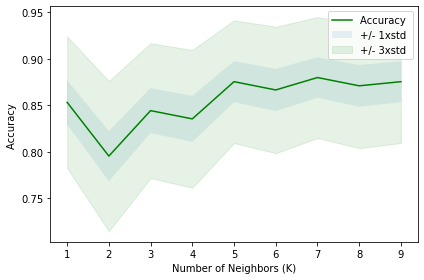

In [22]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [23]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.88 with k= 7


In [24]:
from sklearn.metrics import recall_score
recall_score(y_test, predict, average=None)

array([0.90291262, 0.86065574])

In [25]:
from sklearn.metrics import precision_score
precision_score(y_test, predict, average=None)

array([0.84545455, 0.91304348])



---



---



---



In [26]:
predict = pd.DataFrame(predict)

In [27]:
predict.shape

(225, 1)

In [28]:
merge_1 = pd.DataFrame(y_test)
merge_1.reset_index(drop=True,inplace=True)
merge_2 = pd.DataFrame(X_test)
merge_2['Winning Batting_Team'] = merge_1
test_6 = merge_2

In [29]:
test_6.head()

,0,1,2,3,4,5,6,Winning Batting_Team
0,-0.644756,-0.911914,-0.368455,0.404161,-0.097747,-0.587607,1.077007,1
1,1.603991,1.109412,0.940855,0.404161,0.597910,-0.442207,1.077007,1
2,-1.698714,0.494226,0.247691,-0.466875,0.383075,1.229883,0.256117,0
3,0.781722,0.274517,-0.599510,-0.466875,-0.373963,-0.660306,-0.564772,1
4,-0.036004,-0.911914,-1.215656,1.275197,-0.373963,-1.532701,0.256117,1


In [30]:
test_6.columns = ['key_0', 'balls_x', 'runs_x', 'player_out_x','balls_y', 'runs_y', 'player_out_y', 'Winning Batting_Team']

In [31]:
test_6.head()

,key_0,balls_x,runs_x,player_out_x,balls_y,runs_y,player_out_y,Winning Batting_Team
0,-0.644756,-0.911914,-0.368455,0.404161,-0.097747,-0.587607,1.077007,1
1,1.603991,1.109412,0.940855,0.404161,0.597910,-0.442207,1.077007,1
2,-1.698714,0.494226,0.247691,-0.466875,0.383075,1.229883,0.256117,0
3,0.781722,0.274517,-0.599510,-0.466875,-0.373963,-0.660306,-0.564772,1
4,-0.036004,-0.911914,-1.215656,1.275197,-0.373963,-1.532701,0.256117,1


In [32]:
test_6['KNN Prediction Bat Win 6'] = predict

In [33]:
test_6.head()

,key_0,balls_x,runs_x,player_out_x,balls_y,runs_y,player_out_y,Winning Batting_Team,KNN Prediction Bat Win 6
0,-0.644756,-0.911914,-0.368455,0.404161,-0.097747,-0.587607,1.077007,1,1
1,1.603991,1.109412,0.940855,0.404161,0.597910,-0.442207,1.077007,1,1
2,-1.698714,0.494226,0.247691,-0.466875,0.383075,1.229883,0.256117,0,0
3,0.781722,0.274517,-0.599510,-0.466875,-0.373963,-0.660306,-0.564772,1,0
4,-0.036004,-0.911914,-1.215656,1.275197,-0.373963,-1.532701,0.256117,1,1


## SVM 6 Over 

In [34]:
import pylab as pl
import scipy.optimize as opt

In [35]:
df_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   battingTeam_x         750 non-null    object 
 1   key_0                 750 non-null    int64  
 2   balls_x               750 non-null    float64
 3   runs_x                750 non-null    int64  
 4   player_out_x          750 non-null    int64  
 5   balls_y               750 non-null    float64
 6   runs_y                750 non-null    int64  
 7   player_out_y          750 non-null    int64  
 8   Winning Batting_Team  750 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 52.9+ KB


In [36]:
# X = df_6[num_col_X].astype(float)
feature_df = df_6[['key_0', 'balls_x', 'runs_x', 'player_out_x','balls_y', 'runs_y', 'player_out_y']].astype(float)
X = np.asarray(feature_df)

In [37]:
# y = df_6[num_col_y].astype(float)

# lab = preprocessing.LabelEncoder()
# y_transformed = lab.fit_transform(y)

df_6['Winning Batting_Team'] = df_6['Winning Batting_Team'].astype('float')
y = np.asarray(df_6['Winning Batting_Team'])
y [0:5]

array([1., 1., 1., 0., 0.])

In [38]:


#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

X_transformed = preprocessing.StandardScaler().fit(X).transform(X.astype(float))


In [39]:
X_S_train, X_S_test, y_S_train, y_S_test = train_test_split( X_transformed, y_transformed, test_size=0.3, random_state=4)
print ('Train set:', X_S_train.shape,  y_S_train.shape)
print ('Test set:', X_S_test.shape,  y_S_test.shape)

Train set: (525, 7) (525,)
Test set: (225, 7) (225,)


In [40]:
X_S_test

array([[-0.64475575, -0.91191413, -0.36845521, ..., -0.09774652,
        -0.58760657,  1.0770068 ],
       [ 1.60399076,  1.10941238,  0.94085468, ...,  0.59790971,
        -0.44220739,  1.0770068 ],
       [-1.69871371,  0.49422605,  0.24769062, ...,  0.3830747 ,
         1.22988323,  0.25611747],
       ...,
       [-0.23134983, -0.75811755, -0.59950989, ...,  0.59790971,
         0.06668976, -1.38566119],
       [-1.72142832,  0.42831323, -1.13863749, ...,  0.26031183,
        -1.2419029 , -0.56477186],
       [ 0.91346657, -0.91191413,  1.2489276 , ...,  0.20916064,
         0.72098609,  1.89789613]])

In [41]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_S_train, y_S_train) 

SVC()

In [42]:
yhat = clf.predict(X_S_test)

In [43]:
yhat

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1])

In [44]:
print(metrics.accuracy_score(y_S_test, yhat))
print(recall_score(y_S_test, yhat, average=None))
print(precision_score(y_S_test, yhat, average=None))

0.9422222222222222
[0.96116505 0.92622951]
[0.91666667 0.96581197]


In [45]:
yhat = pd.DataFrame(yhat)

In [46]:
yhat.head()

,0
0,1
1,1
2,0
3,1
4,1


In [47]:
test_6['SVM Prediction Bat Win 6'] = yhat

In [48]:
test_6.head()

,key_0,balls_x,runs_x,player_out_x,balls_y,runs_y,player_out_y,Winning Batting_Team,KNN Prediction Bat Win 6,SVM Prediction Bat Win 6
0,-0.644756,-0.911914,-0.368455,0.404161,-0.097747,-0.587607,1.077007,1,1,1
1,1.603991,1.109412,0.940855,0.404161,0.597910,-0.442207,1.077007,1,1,1
2,-1.698714,0.494226,0.247691,-0.466875,0.383075,1.229883,0.256117,0,0,0
3,0.781722,0.274517,-0.599510,-0.466875,-0.373963,-0.660306,-0.564772,1,0,1
4,-0.036004,-0.911914,-1.215656,1.275197,-0.373963,-1.532701,0.256117,1,1,1




## Logistic Regression 6 Over's

In [49]:
X_L_train, X_L_test, y_L_train, y_L_test = train_test_split( X_transformed, y_transformed, test_size=0.3, random_state=4)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_L_train,y_L_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [51]:
L_predict = LR.predict(X_L_test)
L_predict

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1])

In [52]:
print(metrics.accuracy_score(y_L_test, L_predict))
print(recall_score(y_L_test, L_predict, average=None))
print(precision_score(y_L_test, L_predict, average=None))

0.88
[0.89320388 0.86885246]
[0.85185185 0.90598291]


In [53]:
yhat_prob = LR.predict_proba(X_L_test)
yhat_prob

array([[0.42717264, 0.57282736],
       [0.26842036, 0.73157964],
       [0.61872867, 0.38127133],
       [0.4762483 , 0.5237517 ],
       [0.49137398, 0.50862602],
       [0.64808294, 0.35191706],
       [0.70772705, 0.29227295],
       [0.78314624, 0.21685376],
       [0.44903412, 0.55096588],
       [0.25870118, 0.74129882],
       [0.7566826 , 0.2433174 ],
       [0.39127792, 0.60872208],
       [0.52659576, 0.47340424],
       [0.65465833, 0.34534167],
       [0.82037957, 0.17962043],
       [0.62692637, 0.37307363],
       [0.63763524, 0.36236476],
       [0.7272513 , 0.2727487 ],
       [0.44364721, 0.55635279],
       [0.67081691, 0.32918309],
       [0.54442143, 0.45557857],
       [0.60721423, 0.39278577],
       [0.45528859, 0.54471141],
       [0.5395846 , 0.4604154 ],
       [0.67225223, 0.32774777],
       [0.33679662, 0.66320338],
       [0.55840379, 0.44159621],
       [0.84831276, 0.15168724],
       [0.5628654 , 0.4371346 ],
       [0.72937967, 0.27062033],
       [0.

In [54]:
L_predict = pd.DataFrame(L_predict)
L_predict

,0
0,1
1,1
2,0
3,1
4,1
...,...
220,1
221,0
222,0
223,0


In [55]:
test_6['Log_Reger Prediction Bat Win 6'] = L_predict

In [56]:
test_6.head()

,key_0,balls_x,runs_x,player_out_x,balls_y,runs_y,player_out_y,Winning Batting_Team,KNN Prediction Bat Win 6,SVM Prediction Bat Win 6,Log_Reger Prediction Bat Win 6
0,-0.644756,-0.911914,-0.368455,0.404161,-0.097747,-0.587607,1.077007,1,1,1,1
1,1.603991,1.109412,0.940855,0.404161,0.597910,-0.442207,1.077007,1,1,1,1
2,-1.698714,0.494226,0.247691,-0.466875,0.383075,1.229883,0.256117,0,0,0,0
3,0.781722,0.274517,-0.599510,-0.466875,-0.373963,-0.660306,-0.564772,1,0,1,1
4,-0.036004,-0.911914,-1.215656,1.275197,-0.373963,-1.532701,0.256117,1,1,1,1


## RandomForest 6 Over's

In [57]:
from sklearn.ensemble import RandomForestClassifier

X_R_train, X_R_test, y_R_train, y_R_test = train_test_split( X_transformed, y_transformed, test_size=0.3, random_state=4)

clf = RandomForestClassifier(n_estimators = 1000)

clf.fit(X_R_train, y_R_train)

RandomForestClassifier(n_estimators=1000)

In [58]:
y_R_pred = clf.predict(X_R_test)

y_R_pred

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1])

In [59]:
print(metrics.accuracy_score(y_R_test, y_R_pred))
print(recall_score(y_R_test, y_R_pred, average=None))
print(precision_score(y_R_test, y_R_pred, average=None))

0.9244444444444444
[0.9223301  0.92622951]
[0.91346154 0.9338843 ]


In [60]:
y_R_pred = pd.DataFrame(y_R_pred)
y_R_pred

,0
0,1
1,1
2,0
3,1
4,1
...,...
220,1
221,0
222,0
223,1


In [61]:
test_6['Ran_forest Prediction Bat Win 6'] = y_R_pred

In [62]:
test_6.head()

,key_0,balls_x,runs_x,player_out_x,balls_y,runs_y,player_out_y,Winning Batting_Team,KNN Prediction Bat Win 6,SVM Prediction Bat Win 6,Log_Reger Prediction Bat Win 6,Ran_forest Prediction Bat Win 6
0,-0.644756,-0.911914,-0.368455,0.404161,-0.097747,-0.587607,1.077007,1,1,1,1,1
1,1.603991,1.109412,0.940855,0.404161,0.597910,-0.442207,1.077007,1,1,1,1,1
2,-1.698714,0.494226,0.247691,-0.466875,0.383075,1.229883,0.256117,0,0,0,0,0
3,0.781722,0.274517,-0.599510,-0.466875,-0.373963,-0.660306,-0.564772,1,0,1,1,1
4,-0.036004,-0.911914,-1.215656,1.275197,-0.373963,-1.532701,0.256117,1,1,1,1,1


## Naive Baye's 6 Over's




In [63]:
X_N_train, X_N_test, y_N_train, y_N_test = train_test_split( X_transformed, y_transformed, test_size=0.3, random_state=4)

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_N_train, y_N_train)

#Predict the response for test dataset
N_predict = gnb.predict(X_N_test)

N_predict

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1])

In [64]:
print(metrics.accuracy_score(y_N_test, N_predict))
print(recall_score(y_N_test, N_predict, average=None))
print(precision_score(y_N_test, N_predict, average=None))

0.8088888888888889
[0.9223301  0.71311475]
[0.73076923 0.91578947]


In [65]:
N_predict = pd.DataFrame(N_predict)
N_predict

,0
0,1
1,1
2,0
3,0
4,0
...,...
220,1
221,0
222,0
223,0


In [66]:
test_6['Naive Bayes Prediction Bat Win 6'] = N_predict

In [67]:
test_6.head()

,key_0,balls_x,runs_x,player_out_x,balls_y,runs_y,player_out_y,Winning Batting_Team,KNN Prediction Bat Win 6,SVM Prediction Bat Win 6,Log_Reger Prediction Bat Win 6,Ran_forest Prediction Bat Win 6,Naive Bayes Prediction Bat Win 6
0,-0.644756,-0.911914,-0.368455,0.404161,-0.097747,-0.587607,1.077007,1,1,1,1,1,1
1,1.603991,1.109412,0.940855,0.404161,0.597910,-0.442207,1.077007,1,1,1,1,1,1
2,-1.698714,0.494226,0.247691,-0.466875,0.383075,1.229883,0.256117,0,0,0,0,0,0
3,0.781722,0.274517,-0.599510,-0.466875,-0.373963,-0.660306,-0.564772,1,0,1,1,1,0
4,-0.036004,-0.911914,-1.215656,1.275197,-0.373963,-1.532701,0.256117,1,1,1,1,1,0


In [68]:
test_6.shape

(225, 13)

# 10 Over's Match Model Run

In [69]:
df_10.columns

Index(['battingTeam_x', 'key_0', 'balls_x', 'runs_x', 'player_out_x',
       'balls_y', 'runs_y', 'player_out_y', 'Winning Batting_Team'],
      dtype='object')

In [70]:
cols = ['battingTeam_x', 'key_0', 'balls_x', 'runs_x', 'player_out_x',
       'balls_y', 'runs_y', 'player_out_y', 'Winning Batting_Team']

In [71]:
df_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   battingTeam_x         750 non-null    object 
 1   key_0                 750 non-null    int64  
 2   balls_x               750 non-null    float64
 3   runs_x                750 non-null    int64  
 4   player_out_x          750 non-null    int64  
 5   balls_y               750 non-null    float64
 6   runs_y                750 non-null    int64  
 7   player_out_y          750 non-null    int64  
 8   Winning Batting_Team  750 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 52.9+ KB


In [72]:
num_col_X = ['key_0', 'balls_x', 'runs_x', 'player_out_x','balls_y', 'runs_y', 'player_out_y']
num_col_y = ['Winning Batting_Team']

In [73]:
X_numeric_10 = df_10[num_col_X].astype(float)

In [74]:
y_numeric_10 = df_10[num_col_y]

##KNN 10 Over's

In [75]:
lab = preprocessing.LabelEncoder()
y_transformed10 = lab.fit_transform(y_numeric_10)
X_normalized_10 = preprocessing.StandardScaler().fit(X_numeric_10).transform(X_numeric_10.astype(float))

X10_train, X10_test, y10_train, y10_test = train_test_split( X_normalized_10, y_transformed10, test_size=0.3, random_state=4)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [76]:
K = 1
    
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = K).fit(X10_train,y10_train)

In [77]:
predict10 = knn.predict(X10_test)

**Accuracy Calculation**

In [78]:
lab = preprocessing.LabelEncoder()
y10_transformed = lab.fit_transform(y10_test)

In [79]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X10_train,y10_train)
    predict1=neigh.predict(X10_test)
    mean_acc[n-1] = metrics.accuracy_score(y10_test, predict1)

    
    std_acc[n-1]=np.std(predict1==y10_test)/np.sqrt(predict1.shape[0])

mean_acc

array([0.80444444, 0.73777778, 0.81777778, 0.81333333, 0.84888889,
       0.83555556, 0.82666667, 0.82666667, 0.84888889])

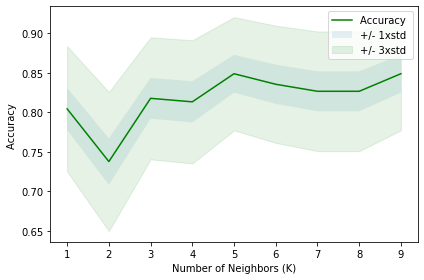

In [80]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [81]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8488888888888889 with k= 5


In [82]:
print(recall_score(y10_test, predict10, average=None))
print(precision_score(y10_test, predict10, average=None))

[0.80909091 0.8       ]
[0.79464286 0.81415929]




---



---



---



In [83]:
predict10 = pd.DataFrame(predict10)

In [84]:
predict10.shape

(225, 1)

In [85]:
merge_10 = pd.DataFrame(y10_test)
merge_10.reset_index(drop=True,inplace=True)
merge_20 = pd.DataFrame(X10_test)
merge_20['Winning Batting_Team'] = merge_10
test_10 = merge_20

In [86]:
test_10.head()

,0,1,2,3,4,5,6,Winning Batting_Team
0,-0.985475,-0.236174,0.108327,-0.331278,0.639743,1.475803,-0.459840,0
1,-0.526640,-0.458142,-0.003274,-1.719312,0.223533,-0.858545,0.798846,1
2,0.004882,0.041285,0.275729,-1.025295,-0.007105,0.414736,-0.459840,0
3,0.609091,0.041285,1.447539,0.362740,0.271252,0.573896,-1.718525,1
4,1.022497,0.020476,-1.565687,1.750774,0.268601,-0.115798,-1.089182,0


In [87]:
test_10.columns = ['key_0', 'balls_x', 'runs_x', 'player_out_x','balls_y', 'runs_y', 'player_out_y', 'Winning Batting_Team']

In [88]:
test_10.head()

,key_0,balls_x,runs_x,player_out_x,balls_y,runs_y,player_out_y,Winning Batting_Team
0,-0.985475,-0.236174,0.108327,-0.331278,0.639743,1.475803,-0.459840,0
1,-0.526640,-0.458142,-0.003274,-1.719312,0.223533,-0.858545,0.798846,1
2,0.004882,0.041285,0.275729,-1.025295,-0.007105,0.414736,-0.459840,0
3,0.609091,0.041285,1.447539,0.362740,0.271252,0.573896,-1.718525,1
4,1.022497,0.020476,-1.565687,1.750774,0.268601,-0.115798,-1.089182,0


In [89]:
test_10['KNN Prediction Bat Win 10'] = round(predict,1)

In [90]:
test_10.head()

,key_0,balls_x,runs_x,player_out_x,balls_y,runs_y,player_out_y,Winning Batting_Team,KNN Prediction Bat Win 10
0,-0.985475,-0.236174,0.108327,-0.331278,0.639743,1.475803,-0.459840,0,1
1,-0.526640,-0.458142,-0.003274,-1.719312,0.223533,-0.858545,0.798846,1,1
2,0.004882,0.041285,0.275729,-1.025295,-0.007105,0.414736,-0.459840,0,0
3,0.609091,0.041285,1.447539,0.362740,0.271252,0.573896,-1.718525,1,0
4,1.022497,0.020476,-1.565687,1.750774,0.268601,-0.115798,-1.089182,0,1


## SVM 10 Over's

In [91]:
df_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   battingTeam_x         750 non-null    object 
 1   key_0                 750 non-null    int64  
 2   balls_x               750 non-null    float64
 3   runs_x                750 non-null    int64  
 4   player_out_x          750 non-null    int64  
 5   balls_y               750 non-null    float64
 6   runs_y                750 non-null    int64  
 7   player_out_y          750 non-null    int64  
 8   Winning Batting_Team  750 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 52.9+ KB


In [92]:
# X = df_6[num_col_X].astype(float)
feature_df = df_10[['key_0', 'balls_x', 'runs_x', 'player_out_x','balls_y', 'runs_y', 'player_out_y']].astype(float)
X10 = np.asarray(feature_df)

In [93]:
df_10['Winning Batting_Team'] = df_10['Winning Batting_Team'].astype('float')
y10 = np.asarray(df_6['Winning Batting_Team'])
y10 [0:5]

array([1., 1., 1., 0., 0.])

In [94]:
lab = preprocessing.LabelEncoder()
y_transformed10 = lab.fit_transform(y10)

X_transformed10 = preprocessing.StandardScaler().fit(X10).transform(X10.astype(float))


In [95]:
X10_S_train, X10_S_test, y10_S_train, y10_S_test = train_test_split( X_transformed10, y_transformed10, test_size=0.3, random_state=4)
print ('Train set:', X10_S_train.shape,  y10_S_train.shape)
print ('Test set:', X10_S_test.shape,  y10_S_test.shape)

Train set: (525, 7) (525,)
Test set: (225, 7) (225,)


In [96]:
clf = svm.SVC(kernel='rbf')
clf.fit(X10_S_train, y10_S_train) 

SVC()

In [97]:
yhat10 = clf.predict(X10_S_test)

In [98]:
yhat10

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1])

In [99]:
print(metrics.accuracy_score(y10_S_test, yhat10))
print(recall_score(y10_S_test, yhat10, average=None))
print(precision_score(y10_S_test, yhat10, average=None))

0.5244444444444445
[0.49514563 0.54918033]
[0.48113208 0.56302521]


In [100]:
yhat10 = pd.DataFrame(yhat10)

In [101]:
yhat10.head()

,0
0,1
1,0
2,0
3,0
4,1


In [102]:
test_10['SVM Prediction Bat Win 10'] = yhat

In [103]:
test_10.head()

,key_0,balls_x,runs_x,player_out_x,balls_y,runs_y,player_out_y,Winning Batting_Team,KNN Prediction Bat Win 10,SVM Prediction Bat Win 10
0,-0.985475,-0.236174,0.108327,-0.331278,0.639743,1.475803,-0.459840,0,1,1
1,-0.526640,-0.458142,-0.003274,-1.719312,0.223533,-0.858545,0.798846,1,1,1
2,0.004882,0.041285,0.275729,-1.025295,-0.007105,0.414736,-0.459840,0,0,0
3,0.609091,0.041285,1.447539,0.362740,0.271252,0.573896,-1.718525,1,0,1
4,1.022497,0.020476,-1.565687,1.750774,0.268601,-0.115798,-1.089182,0,1,1


## Logisitic Regression 10 Over's

In [104]:
X10_L_train, X10_L_test, y10_L_train, y10_L_test = train_test_split( X_transformed10, y_transformed10, test_size=0.3, random_state=4)

In [105]:
LR10 = LogisticRegression(C=0.01, solver='liblinear').fit(X10_L_train,y10_L_train)
LR10

LogisticRegression(C=0.01, solver='liblinear')

In [106]:
L_predict10 = LR.predict(X10_L_test)
L_predict10

array([0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0])

In [107]:
print(metrics.accuracy_score(y10_L_test, L_predict10))
print(recall_score(y10_L_test, L_predict10, average=None))
print(precision_score(y10_L_test, L_predict10, average=None))

0.44
[0.45631068 0.42622951]
[0.4017094  0.48148148]


In [108]:
L_predict10 = pd.DataFrame(L_predict10)
L_predict10

,0
0,0
1,1
2,1
3,1
4,0
...,...
220,0
221,1
222,1
223,1


In [109]:
test_10['Log_Reger Prediction Bat Win 10'] = L_predict

In [110]:
test_10.head()

,key_0,balls_x,runs_x,player_out_x,balls_y,runs_y,player_out_y,Winning Batting_Team,KNN Prediction Bat Win 10,SVM Prediction Bat Win 10,Log_Reger Prediction Bat Win 10
0,-0.985475,-0.236174,0.108327,-0.331278,0.639743,1.475803,-0.459840,0,1,1,1
1,-0.526640,-0.458142,-0.003274,-1.719312,0.223533,-0.858545,0.798846,1,1,1,1
2,0.004882,0.041285,0.275729,-1.025295,-0.007105,0.414736,-0.459840,0,0,0,0
3,0.609091,0.041285,1.447539,0.362740,0.271252,0.573896,-1.718525,1,0,1,1
4,1.022497,0.020476,-1.565687,1.750774,0.268601,-0.115798,-1.089182,0,1,1,1


## RandomForest 10 Over's

In [111]:
X10_R_train, X10_R_test, y10_R_train, y10_R_test = train_test_split( X_transformed10, y_transformed10, test_size=0.3, random_state=4)

clf = RandomForestClassifier(n_estimators = 1000)

clf.fit(X10_R_train, y10_R_train)

RandomForestClassifier(n_estimators=1000)

In [112]:
y_R_pred10 = clf.predict(X10_R_test)

y_R_pred10

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1])

In [113]:
print(metrics.accuracy_score(y10_R_test, y_R_pred10))
print(recall_score(y10_R_test, y_R_pred10, average=None))
print(precision_score(y10_R_test, y_R_pred10, average=None))

0.5155555555555555
[0.49514563 0.53278689]
[0.47222222 0.55555556]


In [114]:
y_R_pred10 = pd.DataFrame(y_R_pred10)
y_R_pred10

,0
0,1
1,0
2,1
3,1
4,1
...,...
220,0
221,0
222,0
223,1


In [115]:
test_10['Ran_forest Prediction Bat Win 10'] = y_R_pred10

In [116]:
test_10.head()

,key_0,balls_x,runs_x,player_out_x,balls_y,runs_y,player_out_y,Winning Batting_Team,KNN Prediction Bat Win 10,SVM Prediction Bat Win 10,Log_Reger Prediction Bat Win 10,Ran_forest Prediction Bat Win 10
0,-0.985475,-0.236174,0.108327,-0.331278,0.639743,1.475803,-0.459840,0,1,1,1,1
1,-0.526640,-0.458142,-0.003274,-1.719312,0.223533,-0.858545,0.798846,1,1,1,1,0
2,0.004882,0.041285,0.275729,-1.025295,-0.007105,0.414736,-0.459840,0,0,0,0,1
3,0.609091,0.041285,1.447539,0.362740,0.271252,0.573896,-1.718525,1,0,1,1,1
4,1.022497,0.020476,-1.565687,1.750774,0.268601,-0.115798,-1.089182,0,1,1,1,1


## Naive Bayes 10 Over's

In [117]:
X10_N_train, X10_N_test, y10_N_train, y10_N_test = train_test_split( X_transformed10, y_transformed10, test_size=0.3, random_state=4)

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X10_N_train, y10_N_train)

#Predict the response for test dataset
N_predict10 = gnb.predict(X10_N_test)

N_predict10

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1])

In [118]:
print(metrics.accuracy_score(y10_N_test, N_predict10))
print(recall_score(y10_N_test, N_predict10, average=None))
print(precision_score(y10_N_test, N_predict10, average=None))

0.5511111111111111
[0.41747573 0.66393443]
[0.51190476 0.57446809]


In [119]:
N_predict10 = pd.DataFrame(N_predict10)
N_predict10

,0
0,0
1,0
2,0
3,1
4,1
...,...
220,1
221,0
222,0
223,1


In [120]:
test_10['Naive Bayes Bat Win 10'] = N_predict10

In [121]:
test_10.head()

,key_0,balls_x,runs_x,player_out_x,balls_y,runs_y,player_out_y,Winning Batting_Team,KNN Prediction Bat Win 10,SVM Prediction Bat Win 10,Log_Reger Prediction Bat Win 10,Ran_forest Prediction Bat Win 10,Naive Bayes Bat Win 10
0,-0.985475,-0.236174,0.108327,-0.331278,0.639743,1.475803,-0.459840,0,1,1,1,1,0
1,-0.526640,-0.458142,-0.003274,-1.719312,0.223533,-0.858545,0.798846,1,1,1,1,0,0
2,0.004882,0.041285,0.275729,-1.025295,-0.007105,0.414736,-0.459840,0,0,0,0,1,0
3,0.609091,0.041285,1.447539,0.362740,0.271252,0.573896,-1.718525,1,0,1,1,1,1
4,1.022497,0.020476,-1.565687,1.750774,0.268601,-0.115798,-1.089182,0,1,1,1,1,1


# 15 Over's Match Model Run

In [122]:
df_15.columns

Index(['battingTeam_x', 'key_0', 'balls_x', 'runs_x', 'player_out_x',
       'balls_y', 'runs_y', 'player_out_y', 'Winning Batting_Team'],
      dtype='object')

In [123]:
cols = ['battingTeam_x', 'key_0', 'balls_x', 'runs_x', 'player_out_x',
       'balls_y', 'runs_y', 'player_out_y', 'Winning Batting_Team']

In [124]:
df_15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   battingTeam_x         750 non-null    object 
 1   key_0                 750 non-null    int64  
 2   balls_x               750 non-null    float64
 3   runs_x                750 non-null    int64  
 4   player_out_x          750 non-null    int64  
 5   balls_y               750 non-null    float64
 6   runs_y                750 non-null    int64  
 7   player_out_y          750 non-null    int64  
 8   Winning Batting_Team  750 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 52.9+ KB


In [125]:
num_col_X = ['key_0', 'balls_x', 'runs_x', 'player_out_x','balls_y', 'runs_y', 'player_out_y']
num_col_y = ['Winning Batting_Team']

In [126]:
X_numeric_15 = df_15[num_col_X].astype(float)

In [127]:
y_numeric_15 = df_15[num_col_y]

In [128]:
lab = preprocessing.LabelEncoder()
y_transformed15 = lab.fit_transform(y_numeric_15)
X_normalized_15 = preprocessing.StandardScaler().fit(X_numeric_15).transform(X_numeric_15.astype(float))

X15_train, X15_test, y15_train, y15_test = train_test_split( X_normalized_15, y_transformed15, test_size=0.3, random_state=4)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [129]:
K = 4
    
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = K).fit(X15_train,y15_train)

In [130]:
predict15 = knn.predict(X15_test)

**Accuracy Calculation**

In [131]:
lab = preprocessing.LabelEncoder()
y15_transformed = lab.fit_transform(y15_test)

In [132]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X15_train,y15_train)
    predict1=neigh.predict(X15_test)
    mean_acc[n-1] = metrics.accuracy_score(y15_test, predict1)

    
    std_acc[n-1]=np.std(predict1==y15_test)/np.sqrt(predict1.shape[0])

mean_acc

array([0.84444444, 0.83111111, 0.83111111, 0.84444444, 0.84      ,
       0.83555556, 0.82222222, 0.81333333, 0.82666667])

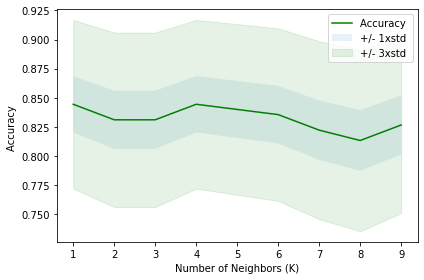

In [133]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [134]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8444444444444444 with k= 1


In [135]:
print(recall_score(y15_test, predict15, average=None))
print(precision_score(y15_test, predict15, average=None))

[0.91262136 0.78688525]
[0.78333333 0.91428571]




---



---



---



In [136]:
predict15 = pd.DataFrame(predict15)

In [137]:
predict15.shape

(225, 1)

In [138]:
merge_15 = pd.DataFrame(y15_test)
merge_15.reset_index(drop=True,inplace=True)
merge_30 = pd.DataFrame(X15_test)
merge_30['Winning Batting_Team'] = merge_15
test_15 = merge_30

In [139]:
test_15.head()

,0,1,2,3,4,5,6,Winning Batting_Team
0,-1.171735,0.078078,0.636516,0.018086,0.177773,0.895070,-0.112354,0
1,0.345601,-0.017689,-2.012238,1.787371,0.199921,-0.676883,-0.583112,0
2,1.172413,0.291454,-0.015485,-0.571676,0.257341,-0.008803,0.829161,1
3,-0.399438,0.612359,1.003267,-1.161437,0.391048,0.580679,1.299919,1
4,0.359230,0.269613,-1.034237,0.018086,0.249138,-0.598285,-0.583112,0


In [140]:
test_15.columns = ['key_0', 'balls_x', 'runs_x', 'player_out_x','balls_y', 'runs_y', 'player_out_y', 'Winning Batting_Team']

In [141]:
test_15.head()

,key_0,balls_x,runs_x,player_out_x,balls_y,runs_y,player_out_y,Winning Batting_Team
0,-1.171735,0.078078,0.636516,0.018086,0.177773,0.895070,-0.112354,0
1,0.345601,-0.017689,-2.012238,1.787371,0.199921,-0.676883,-0.583112,0
2,1.172413,0.291454,-0.015485,-0.571676,0.257341,-0.008803,0.829161,1
3,-0.399438,0.612359,1.003267,-1.161437,0.391048,0.580679,1.299919,1
4,0.359230,0.269613,-1.034237,0.018086,0.249138,-0.598285,-0.583112,0


In [142]:
test_15['KNN Prediction Bat Win 15'] = round(predict15,1)

In [143]:
test_15.head()

,key_0,balls_x,runs_x,player_out_x,balls_y,runs_y,player_out_y,Winning Batting_Team,KNN Prediction Bat Win 15
0,-1.171735,0.078078,0.636516,0.018086,0.177773,0.895070,-0.112354,0,0
1,0.345601,-0.017689,-2.012238,1.787371,0.199921,-0.676883,-0.583112,0,0
2,1.172413,0.291454,-0.015485,-0.571676,0.257341,-0.008803,0.829161,1,1
3,-0.399438,0.612359,1.003267,-1.161437,0.391048,0.580679,1.299919,1,1
4,0.359230,0.269613,-1.034237,0.018086,0.249138,-0.598285,-0.583112,0,0


## SVM 15 Over's

In [144]:
df_15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   battingTeam_x         750 non-null    object 
 1   key_0                 750 non-null    int64  
 2   balls_x               750 non-null    float64
 3   runs_x                750 non-null    int64  
 4   player_out_x          750 non-null    int64  
 5   balls_y               750 non-null    float64
 6   runs_y                750 non-null    int64  
 7   player_out_y          750 non-null    int64  
 8   Winning Batting_Team  750 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 52.9+ KB


In [145]:
# X = df_6[num_col_X].astype(float)
feature_df = df_15[['key_0', 'balls_x', 'runs_x', 'player_out_x','balls_y', 'runs_y', 'player_out_y']].astype(float)
X15 = np.asarray(feature_df)

In [146]:
df_15['Winning Batting_Team'] = df_15['Winning Batting_Team'].astype('float')
y15 = np.asarray(df_15['Winning Batting_Team'])
y15 [0:5]

array([0., 0., 0., 0., 0.])

In [147]:
lab = preprocessing.LabelEncoder()
y_transformed15 = lab.fit_transform(y15)

X_transformed15 = preprocessing.StandardScaler().fit(X15).transform(X15.astype(float))


In [148]:
X15_S_train, X15_S_test, y15_S_train, y15_S_test = train_test_split( X_transformed15, y_transformed15, test_size=0.3, random_state=4)
print ('Train set:', X15_S_train.shape,  y15_S_train.shape)
print ('Test set:', X15_S_test.shape,  y15_S_test.shape)

Train set: (525, 7) (525,)
Test set: (225, 7) (225,)


In [149]:
clf = svm.SVC(kernel='rbf')
clf.fit(X15_S_train, y15_S_train) 

SVC()

In [150]:
yhat15 = clf.predict(X15_S_test)

In [151]:
print(metrics.accuracy_score(y15_S_test, yhat15))
print(recall_score(y15_S_test, yhat15, average=None))
print(precision_score(y15_S_test, yhat15, average=None))

0.9022222222222223
[0.9223301 0.8852459]
[0.87155963 0.93103448]


In [152]:
yhat15

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1])

In [153]:
yhat15 = pd.DataFrame(yhat15)

In [154]:
yhat15.head()

,0
0,0
1,0
2,1
3,1
4,0


In [155]:
test_15['SVM Prediction Bat Win 15'] = yhat15

In [156]:
test_15.head()

,key_0,balls_x,runs_x,player_out_x,balls_y,runs_y,player_out_y,Winning Batting_Team,KNN Prediction Bat Win 15,SVM Prediction Bat Win 15
0,-1.171735,0.078078,0.636516,0.018086,0.177773,0.895070,-0.112354,0,0,0
1,0.345601,-0.017689,-2.012238,1.787371,0.199921,-0.676883,-0.583112,0,0,0
2,1.172413,0.291454,-0.015485,-0.571676,0.257341,-0.008803,0.829161,1,1,1
3,-0.399438,0.612359,1.003267,-1.161437,0.391048,0.580679,1.299919,1,1,1
4,0.359230,0.269613,-1.034237,0.018086,0.249138,-0.598285,-0.583112,0,0,0


## Logistic Regression 15 Over's

In [157]:
X15_L_train, X15_L_test, y15_L_train, y15_L_test = train_test_split( X_transformed15, y_transformed15, test_size=0.3, random_state=4)

In [158]:
LR15 = LogisticRegression(C=0.01, solver='liblinear').fit(X15_L_train,y15_L_train)
LR15

LogisticRegression(C=0.01, solver='liblinear')

In [159]:
L_predict15 = LR.predict(X15_L_test)
L_predict15

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1])

In [160]:
print(metrics.accuracy_score(y15_L_test, L_predict15))
print(recall_score(y15_L_test, L_predict15, average=None))
print(precision_score(y15_L_test, L_predict15, average=None))

0.8577777777777778
[0.90291262 0.81967213]
[0.80869565 0.90909091]


In [161]:
L_predict15 = pd.DataFrame(L_predict15)
L_predict15

,0
0,0
1,0
2,1
3,1
4,0
...,...
220,0
221,1
222,1
223,1


In [162]:
test_15['Log_Reger Prediction Bat Win 15'] = L_predict15

In [163]:
test_15.head()

,key_0,balls_x,runs_x,player_out_x,balls_y,runs_y,player_out_y,Winning Batting_Team,KNN Prediction Bat Win 15,SVM Prediction Bat Win 15,Log_Reger Prediction Bat Win 15
0,-1.171735,0.078078,0.636516,0.018086,0.177773,0.895070,-0.112354,0,0,0,0
1,0.345601,-0.017689,-2.012238,1.787371,0.199921,-0.676883,-0.583112,0,0,0,0
2,1.172413,0.291454,-0.015485,-0.571676,0.257341,-0.008803,0.829161,1,1,1,1
3,-0.399438,0.612359,1.003267,-1.161437,0.391048,0.580679,1.299919,1,1,1,1
4,0.359230,0.269613,-1.034237,0.018086,0.249138,-0.598285,-0.583112,0,0,0,0


## RandommForest 15 Over's

In [164]:
X15_R_train, X15_R_test, y15_R_train, y15_R_test = train_test_split( X_transformed15, y_transformed15, test_size=0.3, random_state=4)

clf = RandomForestClassifier(n_estimators = 1000)

clf.fit(X15_R_train, y15_R_train)

RandomForestClassifier(n_estimators=1000)

In [165]:
y_R_pred15 = clf.predict(X15_R_test)

y_R_pred15

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1])

In [166]:
print(metrics.accuracy_score(y15_R_test, y_R_pred15))
print(recall_score(y15_R_test, y_R_pred15, average=None))
print(precision_score(y15_R_test, y_R_pred15, average=None))

0.88
[0.84466019 0.90983607]
[0.8877551  0.87401575]


In [167]:
y_R_pred15 = pd.DataFrame(y_R_pred15)
y_R_pred15

,0
0,0
1,0
2,1
3,1
4,0
...,...
220,0
221,1
222,1
223,1


In [168]:
test_15['Ran_forest Prediction Bat Win 15'] = y_R_pred15

In [169]:
test_15.head()

,key_0,balls_x,runs_x,player_out_x,balls_y,runs_y,player_out_y,Winning Batting_Team,KNN Prediction Bat Win 15,SVM Prediction Bat Win 15,Log_Reger Prediction Bat Win 15,Ran_forest Prediction Bat Win 15
0,-1.171735,0.078078,0.636516,0.018086,0.177773,0.895070,-0.112354,0,0,0,0,0
1,0.345601,-0.017689,-2.012238,1.787371,0.199921,-0.676883,-0.583112,0,0,0,0,0
2,1.172413,0.291454,-0.015485,-0.571676,0.257341,-0.008803,0.829161,1,1,1,1,1
3,-0.399438,0.612359,1.003267,-1.161437,0.391048,0.580679,1.299919,1,1,1,1,1
4,0.359230,0.269613,-1.034237,0.018086,0.249138,-0.598285,-0.583112,0,0,0,0,0


## Naive Bayes 15 Over's




In [170]:
X15_N_train, X15_N_test, y15_N_train, y15_N_test = train_test_split( X_transformed15, y_transformed15, test_size=0.3, random_state=4)

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X15_N_train, y15_N_train)

#Predict the response for test dataset
N_predict15 = gnb.predict(X15_N_test)

N_predict15

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1])

In [171]:
print(metrics.accuracy_score(y15_N_test, N_predict15))
print(recall_score(y15_N_test, N_predict15, average=None))
print(precision_score(y15_N_test, N_predict15, average=None))

0.7822222222222223
[0.82524272 0.74590164]
[0.73275862 0.83486239]


In [172]:
N_predict15 = pd.DataFrame(N_predict15)
N_predict15

,0
0,0
1,0
2,1
3,1
4,0
...,...
220,0
221,1
222,1
223,1


In [173]:
test_15['Naive Bayes Prediction Bat Win 15'] = N_predict15

In [174]:
test_15.head()

,key_0,balls_x,runs_x,player_out_x,balls_y,runs_y,player_out_y,Winning Batting_Team,KNN Prediction Bat Win 15,SVM Prediction Bat Win 15,Log_Reger Prediction Bat Win 15,Ran_forest Prediction Bat Win 15,Naive Bayes Prediction Bat Win 15
0,-1.171735,0.078078,0.636516,0.018086,0.177773,0.895070,-0.112354,0,0,0,0,0,0
1,0.345601,-0.017689,-2.012238,1.787371,0.199921,-0.676883,-0.583112,0,0,0,0,0,0
2,1.172413,0.291454,-0.015485,-0.571676,0.257341,-0.008803,0.829161,1,1,1,1,1,1
3,-0.399438,0.612359,1.003267,-1.161437,0.391048,0.580679,1.299919,1,1,1,1,1,1
4,0.359230,0.269613,-1.034237,0.018086,0.249138,-0.598285,-0.583112,0,0,0,0,0,0


## 20 Over's Match Model Run

In [175]:
df_20.columns

Index(['battingTeam_x', 'key_0', 'balls_x', 'runs_x', 'player_out_x',
       'balls_y', 'runs_y', 'player_out_y', 'Winning Batting_Team'],
      dtype='object')

In [176]:
cols = ['battingTeam_x', 'key_0', 'balls_x', 'runs_x', 'player_out_x',
       'balls_y', 'runs_y', 'player_out_y', 'Winning Batting_Team']

In [177]:
df_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   battingTeam_x         750 non-null    object 
 1   key_0                 750 non-null    int64  
 2   balls_x               750 non-null    float64
 3   runs_x                750 non-null    int64  
 4   player_out_x          750 non-null    int64  
 5   balls_y               750 non-null    float64
 6   runs_y                750 non-null    int64  
 7   player_out_y          750 non-null    int64  
 8   Winning Batting_Team  750 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 52.9+ KB


In [178]:
num_col_X = ['key_0', 'balls_x', 'runs_x', 'player_out_x','balls_y', 'runs_y', 'player_out_y']
num_col_y = ['Winning Batting_Team']

## KNN 20 Over's

In [179]:
X_numeric_20 = df_20[num_col_X].astype(float)

In [180]:
y_numeric_20 = df_20[num_col_y]

In [181]:
lab = preprocessing.LabelEncoder()
y_transformed20 = lab.fit_transform(y_numeric_20)
X_normalized_20 = preprocessing.StandardScaler().fit(X_numeric_20).transform(X_numeric_20.astype(float))

X20_train, X20_test, y20_train, y20_test = train_test_split( X_normalized_20, y_transformed20, test_size=0.3, random_state=4)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [182]:
K = 4
    
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = K).fit(X20_train,y20_train)

In [183]:
predict20 = knn.predict(X20_test)

**Accuracy Calculation**

In [184]:
lab = preprocessing.LabelEncoder()
y20_transformed = lab.fit_transform(y20_test)

In [185]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X20_train,y20_train)
    predict1=neigh.predict(X20_test)
    mean_acc[n-1] = metrics.accuracy_score(y20_test, predict1)

    
    std_acc[n-1]=np.std(predict1==y20_test)/np.sqrt(predict1.shape[0])

mean_acc

array([0.87555556, 0.87555556, 0.90222222, 0.88444444, 0.89777778,
       0.88888889, 0.89333333, 0.87555556, 0.88888889])

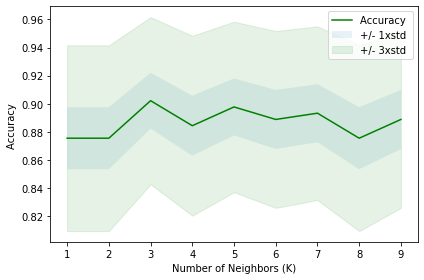

In [186]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [187]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9022222222222223 with k= 3


In [188]:
print(recall_score(y20_test, predict20, average=None))
print(precision_score(y20_test, predict20, average=None))

[0.9673913  0.82706767]
[0.79464286 0.97345133]




---



---



---



In [189]:
predict20 = pd.DataFrame(predict20)

In [190]:
predict20.shape

(225, 1)

In [191]:
y20_test.shape

(225,)

In [192]:
X20_test.shape

(225, 7)

In [193]:
merge_20 = pd.DataFrame(y20_test)
merge_20.reset_index(drop=True,inplace=True)
merge_40 = pd.DataFrame(X20_test)
merge_40['Winning Batting_Team'] = merge_20
test_20 = merge_40

In [194]:
merge_20

,0
0,0
1,0
2,1
3,0
4,1
...,...
220,0
221,1
222,1
223,1


In [195]:
test_20.shape

(225, 8)

In [196]:
test_20.head()

,0,1,2,3,4,5,6,Winning Batting_Team
0,-0.267693,0.188126,-0.232164,-0.442785,0.768133,0.451936,0.439334,0
1,1.681220,-5.751332,-3.413761,2.139555,-3.448532,-2.832827,-1.702596,0
2,-1.380709,0.204463,0.138508,0.073683,0.621578,0.363159,0.439334,1
3,-1.412510,-0.076989,-0.479278,0.073683,0.641792,0.096827,-0.274643,0
4,0.218399,0.002471,0.107618,-0.959253,0.780184,0.156011,0.796322,1


In [197]:
test_20.columns = ['key_0', 'balls_x', 'runs_x', 'player_out_x','balls_y', 'runs_y', 'player_out_y', 'Winning % Batting_Team']

In [198]:
test_20.head()

,key_0,balls_x,runs_x,player_out_x,balls_y,runs_y,player_out_y,Winning % Batting_Team
0,-0.267693,0.188126,-0.232164,-0.442785,0.768133,0.451936,0.439334,0
1,1.681220,-5.751332,-3.413761,2.139555,-3.448532,-2.832827,-1.702596,0
2,-1.380709,0.204463,0.138508,0.073683,0.621578,0.363159,0.439334,1
3,-1.412510,-0.076989,-0.479278,0.073683,0.641792,0.096827,-0.274643,0
4,0.218399,0.002471,0.107618,-0.959253,0.780184,0.156011,0.796322,1


In [199]:
test_20['KNN Prediction Bat Win 20'] = round(predict,1)

In [200]:
test_20.head()

,key_0,balls_x,runs_x,player_out_x,balls_y,runs_y,player_out_y,Winning % Batting_Team,KNN Prediction Bat Win 20
0,-0.267693,0.188126,-0.232164,-0.442785,0.768133,0.451936,0.439334,0,1
1,1.681220,-5.751332,-3.413761,2.139555,-3.448532,-2.832827,-1.702596,0,1
2,-1.380709,0.204463,0.138508,0.073683,0.621578,0.363159,0.439334,1,0
3,-1.412510,-0.076989,-0.479278,0.073683,0.641792,0.096827,-0.274643,0,0
4,0.218399,0.002471,0.107618,-0.959253,0.780184,0.156011,0.796322,1,1


## SVM 20 Over's

In [201]:
df_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   battingTeam_x         750 non-null    object 
 1   key_0                 750 non-null    int64  
 2   balls_x               750 non-null    float64
 3   runs_x                750 non-null    int64  
 4   player_out_x          750 non-null    int64  
 5   balls_y               750 non-null    float64
 6   runs_y                750 non-null    int64  
 7   player_out_y          750 non-null    int64  
 8   Winning Batting_Team  750 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 52.9+ KB


In [202]:
# X = df_6[num_col_X].astype(float)
feature_df = df_20[['key_0', 'balls_x', 'runs_x', 'player_out_x','balls_y', 'runs_y', 'player_out_y']].astype(float)
X20 = np.asarray(feature_df)

In [203]:
df_20['Winning Batting_Team'] = df_20['Winning Batting_Team'].astype('float')
y20 = np.asarray(df_20['Winning Batting_Team'])
y20 [0:5]

array([1., 0., 1., 0., 0.])

In [204]:
lab = preprocessing.LabelEncoder()
y_transformed20 = lab.fit_transform(y20)

X_transformed20 = preprocessing.StandardScaler().fit(X20).transform(X20.astype(float))


In [205]:
X20_S_train, X20_S_test, y20_S_train, y20_S_test = train_test_split( X_transformed20, y_transformed20, test_size=0.3, random_state=4)
print ('Train set:', X20_S_train.shape,  y20_S_train.shape)
print ('Test set:', X20_S_test.shape,  y20_S_test.shape)

Train set: (525, 7) (525,)
Test set: (225, 7) (225,)


In [206]:
clf = svm.SVC(kernel='rbf')
clf.fit(X20_S_train, y20_S_train) 

SVC()

In [207]:
yhat20 = clf.predict(X20_S_test)

In [208]:
print(metrics.accuracy_score(y20_S_test, yhat20))
print(recall_score(y20_S_test, yhat20, average=None))
print(precision_score(y20_S_test, yhat20, average=None))

0.9377777777777778
[0.95652174 0.92481203]
[0.89795918 0.96850394]


In [209]:
yhat20

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1])

In [210]:
yhat20 = pd.DataFrame(yhat20)

In [211]:
yhat20.head()

,0
0,0
1,0
2,1
3,0
4,1


In [212]:
test_20['SVM Prediction Bat Win 20'] = yhat20

In [213]:
test_20.head()

,key_0,balls_x,runs_x,player_out_x,balls_y,runs_y,player_out_y,Winning % Batting_Team,KNN Prediction Bat Win 20,SVM Prediction Bat Win 20
0,-0.267693,0.188126,-0.232164,-0.442785,0.768133,0.451936,0.439334,0,1,0
1,1.681220,-5.751332,-3.413761,2.139555,-3.448532,-2.832827,-1.702596,0,1,0
2,-1.380709,0.204463,0.138508,0.073683,0.621578,0.363159,0.439334,1,0,1
3,-1.412510,-0.076989,-0.479278,0.073683,0.641792,0.096827,-0.274643,0,0,0
4,0.218399,0.002471,0.107618,-0.959253,0.780184,0.156011,0.796322,1,1,1


## Logistic Regression 20 Over's

In [214]:
X20_L_train, X20_L_test, y20_L_train, y20_L_test = train_test_split( X_transformed20, y_transformed20, test_size=0.3, random_state=4)

In [215]:
LR20 = LogisticRegression(C=0.01, solver='liblinear').fit(X20_L_train,y20_L_train)
LR20

LogisticRegression(C=0.01, solver='liblinear')

In [216]:
L_predict20 = LR.predict(X20_L_test)
L_predict20

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1])

In [217]:
print(metrics.accuracy_score(y20_L_test, L_predict20))
print(recall_score(y20_L_test, L_predict20, average=None))
print(precision_score(y20_L_test, L_predict20, average=None))

0.8355555555555556
[0.97826087 0.73684211]
[0.72 0.98]


In [218]:
L_predict20 = pd.DataFrame(L_predict20)
L_predict20

,0
0,0
1,0
2,0
3,0
4,1
...,...
220,1
221,1
222,1
223,1


In [219]:
test_20['Log_Reger Prediction Bat Win 20'] = L_predict20

In [220]:
test_20.head()

,key_0,balls_x,runs_x,player_out_x,balls_y,runs_y,player_out_y,Winning % Batting_Team,KNN Prediction Bat Win 20,SVM Prediction Bat Win 20,Log_Reger Prediction Bat Win 20
0,-0.267693,0.188126,-0.232164,-0.442785,0.768133,0.451936,0.439334,0,1,0,0
1,1.681220,-5.751332,-3.413761,2.139555,-3.448532,-2.832827,-1.702596,0,1,0,0
2,-1.380709,0.204463,0.138508,0.073683,0.621578,0.363159,0.439334,1,0,1,0
3,-1.412510,-0.076989,-0.479278,0.073683,0.641792,0.096827,-0.274643,0,0,0,0
4,0.218399,0.002471,0.107618,-0.959253,0.780184,0.156011,0.796322,1,1,1,1


## Random Forest 20 Over's

In [221]:
X20_R_train, X20_R_test, y20_R_train, y20_R_test = train_test_split( X_transformed20, y_transformed20, test_size=0.3, random_state=4)

clf = RandomForestClassifier(n_estimators = 1000)

clf.fit(X20_R_train, y20_R_train)

RandomForestClassifier(n_estimators=1000)

In [222]:
y_R_pred20 = clf.predict(X20_R_test)

y_R_pred20

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1])

In [223]:
print(metrics.accuracy_score(y20_R_test, y_R_pred20))
print(recall_score(y20_R_test, y_R_pred20, average=None))
print(precision_score(y20_R_test, y_R_pred20, average=None))

0.9066666666666666
[0.88043478 0.92481203]
[0.89010989 0.91791045]


In [224]:
y_R_pred20 = pd.DataFrame(y_R_pred20)
y_R_pred20

,0
0,0
1,1
2,1
3,0
4,1
...,...
220,1
221,1
222,1
223,1


In [225]:
test_20['Ran_forest Prediction Bat Win 20'] = y_R_pred20

In [226]:
test_20.head()

,key_0,balls_x,runs_x,player_out_x,balls_y,runs_y,player_out_y,Winning % Batting_Team,KNN Prediction Bat Win 20,SVM Prediction Bat Win 20,Log_Reger Prediction Bat Win 20,Ran_forest Prediction Bat Win 20
0,-0.267693,0.188126,-0.232164,-0.442785,0.768133,0.451936,0.439334,0,1,0,0,0
1,1.681220,-5.751332,-3.413761,2.139555,-3.448532,-2.832827,-1.702596,0,1,0,0,1
2,-1.380709,0.204463,0.138508,0.073683,0.621578,0.363159,0.439334,1,0,1,0,1
3,-1.412510,-0.076989,-0.479278,0.073683,0.641792,0.096827,-0.274643,0,0,0,0,0
4,0.218399,0.002471,0.107618,-0.959253,0.780184,0.156011,0.796322,1,1,1,1,1


## Naive Bayes 20 Over's

In [227]:
X20_N_train, X20_N_test, y20_N_train, y20_N_test = train_test_split( X_transformed20, y_transformed20, test_size=0.3, random_state=4)

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X20_N_train, y20_N_train)

#Predict the response for test dataset
N_predict20 = gnb.predict(X20_N_test)

N_predict20

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1])

In [228]:
print(metrics.accuracy_score(y20_N_test, N_predict20))
print(recall_score(y20_N_test, N_predict20, average=None))
print(precision_score(y20_N_test, N_predict20, average=None))

0.8088888888888889
[0.83695652 0.78947368]
[0.73333333 0.875     ]


In [229]:
N_predict20 = pd.DataFrame(N_predict20)
N_predict20

,0
0,1
1,1
2,1
3,0
4,1
...,...
220,1
221,1
222,1
223,1


In [230]:
test_20['Naive Bayes Prediction Bat Win 20'] = N_predict20

In [231]:
test_20.head()

,key_0,balls_x,runs_x,player_out_x,balls_y,runs_y,player_out_y,Winning % Batting_Team,KNN Prediction Bat Win 20,SVM Prediction Bat Win 20,Log_Reger Prediction Bat Win 20,Ran_forest Prediction Bat Win 20,Naive Bayes Prediction Bat Win 20
0,-0.267693,0.188126,-0.232164,-0.442785,0.768133,0.451936,0.439334,0,1,0,0,0,1
1,1.681220,-5.751332,-3.413761,2.139555,-3.448532,-2.832827,-1.702596,0,1,0,0,1,1
2,-1.380709,0.204463,0.138508,0.073683,0.621578,0.363159,0.439334,1,0,1,0,1,1
3,-1.412510,-0.076989,-0.479278,0.073683,0.641792,0.096827,-0.274643,0,0,0,0,0,0
4,0.218399,0.002471,0.107618,-0.959253,0.780184,0.156011,0.796322,1,1,1,1,1,1


In [232]:
test_6.columns

Index(['key_0', 'balls_x', 'runs_x', 'player_out_x', 'balls_y', 'runs_y',
       'player_out_y', 'Winning Batting_Team', 'KNN Prediction Bat Win 6',
       'SVM Prediction Bat Win 6', 'Log_Reger Prediction Bat Win 6',
       'Ran_forest Prediction Bat Win 6', 'Naive Bayes Prediction Bat Win 6'],
      dtype='object')

In [233]:
test_6 = test_6.drop(['key_0', 'balls_x', 'runs_x', 'player_out_x', 'balls_y', 'runs_y','player_out_y'],axis=1)
test_10 = test_10.drop(['key_0', 'balls_x', 'runs_x', 'player_out_x', 'balls_y', 'runs_y','player_out_y'],axis=1)
test_15 = test_15.drop(['key_0', 'balls_x', 'runs_x', 'player_out_x', 'balls_y', 'runs_y','player_out_y'],axis=1)
test_20 = test_20.drop(['key_0', 'balls_x', 'runs_x', 'player_out_x', 'balls_y', 'runs_y','player_out_y'],axis=1)

In [234]:
test_6.head()

,Winning Batting_Team,KNN Prediction Bat Win 6,SVM Prediction Bat Win 6,Log_Reger Prediction Bat Win 6,Ran_forest Prediction Bat Win 6,Naive Bayes Prediction Bat Win 6
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,0,0,0,0,0,0
3,1,0,1,1,1,0
4,1,1,1,1,1,0


In [235]:
test_10.head()

,Winning Batting_Team,KNN Prediction Bat Win 10,SVM Prediction Bat Win 10,Log_Reger Prediction Bat Win 10,Ran_forest Prediction Bat Win 10,Naive Bayes Bat Win 10
0,0,1,1,1,1,0
1,1,1,1,1,0,0
2,0,0,0,0,1,0
3,1,0,1,1,1,1
4,0,1,1,1,1,1


In [236]:
test_15.head()

,Winning Batting_Team,KNN Prediction Bat Win 15,SVM Prediction Bat Win 15,Log_Reger Prediction Bat Win 15,Ran_forest Prediction Bat Win 15,Naive Bayes Prediction Bat Win 15
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,0,0,0,0,0,0


In [237]:
test_20.head()

,Winning % Batting_Team,KNN Prediction Bat Win 20,SVM Prediction Bat Win 20,Log_Reger Prediction Bat Win 20,Ran_forest Prediction Bat Win 20,Naive Bayes Prediction Bat Win 20
0,0,1,0,0,0,1
1,0,1,0,0,1,1
2,1,0,1,0,1,1
3,0,0,0,0,0,0
4,1,1,1,1,1,1


In [238]:
test_6.shape

(225, 6)

In [239]:
test_6.to_csv('/content/gdrive/MyDrive/Mam Hafiza Maria Data Analysis/6overs.csv')

# Re Applying model on test data

In [240]:
test_6.head()

,Winning Batting_Team,KNN Prediction Bat Win 6,SVM Prediction Bat Win 6,Log_Reger Prediction Bat Win 6,Ran_forest Prediction Bat Win 6,Naive Bayes Prediction Bat Win 6
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,0,0,0,0,0,0
3,1,0,1,1,1,0
4,1,1,1,1,1,0


## KNN Model On 6 over retry

In [241]:
test_6.columns

Index(['Winning Batting_Team', 'KNN Prediction Bat Win 6',
       'SVM Prediction Bat Win 6', 'Log_Reger Prediction Bat Win 6',
       'Ran_forest Prediction Bat Win 6', 'Naive Bayes Prediction Bat Win 6'],
      dtype='object')

In [242]:
cols = ['Winning Batting_Team', 'KNN Prediction Bat Win 6',
       'SVM Prediction Bat Win 6', 'Log_Reger Prediction Bat Win 6',
       'Ran_forest Prediction Bat Win 6', 'Naive Bayes Prediction Bat Win 6']

In [243]:
test_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Winning Batting_Team              225 non-null    int64
 1   KNN Prediction Bat Win 6          225 non-null    int64
 2   SVM Prediction Bat Win 6          225 non-null    int64
 3   Log_Reger Prediction Bat Win 6    225 non-null    int64
 4   Ran_forest Prediction Bat Win 6   225 non-null    int64
 5   Naive Bayes Prediction Bat Win 6  225 non-null    int64
dtypes: int64(6)
memory usage: 10.7 KB


In [244]:
X = ['KNN Prediction Bat Win 6',
       'SVM Prediction Bat Win 6', 'Log_Reger Prediction Bat Win 6',
       'Ran_forest Prediction Bat Win 6', 'Naive Bayes Prediction Bat Win 6']
y = ['Winning Batting_Team']

In [245]:
X = test_6[X]
y = test_6[y]

In [246]:
lab = preprocessing.LabelEncoder()
y_transformed6_r = lab.fit_transform(y)
X_normalized_6_r = preprocessing.StandardScaler().fit(X).transform(X)

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split( X_normalized_6_r, y_transformed6_r, test_size=0.3, random_state=4)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [247]:
K = 1
    
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = K).fit(X_train_r,y_train_r)

In [248]:
predict_r = knn.predict(X_test_r)

#### Accuracy Calculation

In [249]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_r,y_train_r)
    predict1=neigh.predict(X_test_r)
    mean_acc[n-1] = metrics.accuracy_score(y_test_r, predict1)

    
    std_acc[n-1]=np.std(predict1==y_test_r)/np.sqrt(predict1.shape[0])

mean_acc

array([0.97058824, 0.95588235, 0.92647059, 0.92647059, 0.92647059,
       0.91176471, 0.91176471, 0.89705882, 0.89705882])

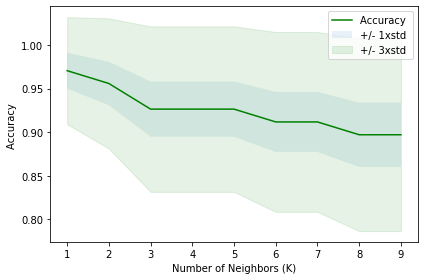

In [250]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [251]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9705882352941176 with k= 1


In [252]:
print(recall_score(y_test_r, predict_r, average=None))
print(precision_score(y_test_r, predict_r, average=None))

[0.93333333 1.        ]
[1.   0.95]


In [253]:
predict_r = pd.DataFrame(predict_r)

In [254]:
predict_r.shape

(68, 1)

In [255]:
merge_1_r = pd.DataFrame(y_test_r)
merge_1_r.reset_index(drop=True,inplace=True)
merge_2_r = pd.DataFrame(X_test_r)
merge_2_r['Winning Batting_Team'] = merge_1_r
test_6_r = merge_2_r

In [256]:
test_6_r.columns = ['KNN Prediction Bat Win 6',
       'SVM Prediction Bat Win 6', 'Log_Reger Prediction Bat Win 6',
       'Ran_forest Prediction Bat Win 6', 'Naive Bayes Prediction Bat Win 6', 'Winning Batting_Team']

In [257]:
merge_2_r.head()

,KNN Prediction Bat Win 6,SVM Prediction Bat Win 6,Log_Reger Prediction Bat Win 6,Ran_forest Prediction Bat Win 6,Naive Bayes Prediction Bat Win 6,Winning Batting_Team
0,-1.022475,-1.040833,-1.040833,-1.078639,-0.854850,0
1,0.978019,0.960769,0.960769,0.927094,1.169795,1
2,0.978019,0.960769,0.960769,0.927094,1.169795,1
3,-1.022475,-1.040833,-1.040833,-1.078639,-0.854850,0
4,0.978019,-1.040833,0.960769,-1.078639,1.169795,1


In [258]:
test_6_r['KNN Prediction Bat Win 6 New'] = round(predict_r,1)

In [259]:
test_6_r.head()

,KNN Prediction Bat Win 6,SVM Prediction Bat Win 6,Log_Reger Prediction Bat Win 6,Ran_forest Prediction Bat Win 6,Naive Bayes Prediction Bat Win 6,Winning Batting_Team,KNN Prediction Bat Win 6 New
0,-1.022475,-1.040833,-1.040833,-1.078639,-0.854850,0,0
1,0.978019,0.960769,0.960769,0.927094,1.169795,1,1
2,0.978019,0.960769,0.960769,0.927094,1.169795,1,1
3,-1.022475,-1.040833,-1.040833,-1.078639,-0.854850,0,0
4,0.978019,-1.040833,0.960769,-1.078639,1.169795,1,1


## SVM Model On 6 over retry

In [260]:
feature_df = test_6[['KNN Prediction Bat Win 6',
       'SVM Prediction Bat Win 6', 'Log_Reger Prediction Bat Win 6',
       'Ran_forest Prediction Bat Win 6', 'Naive Bayes Prediction Bat Win 6']]
X = np.asarray(feature_df)

In [261]:
test_6['Winning Batting_Team'] = test_6['Winning Batting_Team']
y = np.asarray(test_6['Winning Batting_Team'])
y [0:5]

array([1, 1, 0, 1, 1])

In [262]:
lab = preprocessing.LabelEncoder()
y_transformed_r = lab.fit_transform(y)

X_transformed_r = preprocessing.StandardScaler().fit(X).transform(X)


In [263]:
X_S_train_r, X_S_test_r, y_S_train_r, y_S_test_r = train_test_split( X_transformed_r, y_transformed_r, test_size=0.3, random_state=4)

clf = svm.SVC(kernel='rbf')

clf.fit(X_S_train_r, y_S_train_r) 

yhat = clf.predict(X_S_test_r)

print(metrics.accuracy_score(y_S_test_r, yhat))
print(recall_score(y_S_test_r, yhat, average=None))
print(precision_score(y_S_test_r, yhat, average=None))

0.9411764705882353
[0.96666667 0.92105263]
[0.90625    0.97222222]


In [264]:
test_6_r['SVM Prediction Bat Win 6 New'] = yhat
test_6_r.head()

,KNN Prediction Bat Win 6,SVM Prediction Bat Win 6,Log_Reger Prediction Bat Win 6,Ran_forest Prediction Bat Win 6,Naive Bayes Prediction Bat Win 6,Winning Batting_Team,KNN Prediction Bat Win 6 New,SVM Prediction Bat Win 6 New
0,-1.022475,-1.040833,-1.040833,-1.078639,-0.854850,0,0,0
1,0.978019,0.960769,0.960769,0.927094,1.169795,1,1,1
2,0.978019,0.960769,0.960769,0.927094,1.169795,1,1,1
3,-1.022475,-1.040833,-1.040833,-1.078639,-0.854850,0,0,0
4,0.978019,-1.040833,0.960769,-1.078639,1.169795,1,1,0


## Logistic Regression 6 Over's Retry

In [265]:
X_L_train_r, X_L_test_r, y_L_train_r, y_L_test_r = train_test_split( X_transformed_r, y_transformed_r, test_size=0.3, random_state=4)


In [266]:
y_L_test_r

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0])

In [267]:
LR_r = LogisticRegression(C=0.01, solver='liblinear').fit(X_L_train_r,y_L_train_r)

L_predict_r = LR_r.predict(X_L_test_r)
L_predict_r

print(metrics.accuracy_score(y_L_test_r, L_predict_r))
print(recall_score(y_L_test_r, L_predict_r, average=None))
print(precision_score(y_L_test_r, L_predict_r, average=None))

0.9117647058823529
[0.9        0.92105263]
[0.9        0.92105263]


In [268]:
L_predict_r = pd.DataFrame(L_predict_r)
L_predict_r

,0
0,0
1,1
2,1
3,0
4,1
...,...
63,1
64,0
65,0
66,1


In [269]:
test_6_r['Log_Reger Prediction Bat Win 6 New'] = L_predict_r

In [270]:
test_6_r.head()

,KNN Prediction Bat Win 6,SVM Prediction Bat Win 6,Log_Reger Prediction Bat Win 6,Ran_forest Prediction Bat Win 6,Naive Bayes Prediction Bat Win 6,Winning Batting_Team,KNN Prediction Bat Win 6 New,SVM Prediction Bat Win 6 New,Log_Reger Prediction Bat Win 6 New
0,-1.022475,-1.040833,-1.040833,-1.078639,-0.854850,0,0,0,0
1,0.978019,0.960769,0.960769,0.927094,1.169795,1,1,1,1
2,0.978019,0.960769,0.960769,0.927094,1.169795,1,1,1,1
3,-1.022475,-1.040833,-1.040833,-1.078639,-0.854850,0,0,0,0
4,0.978019,-1.040833,0.960769,-1.078639,1.169795,1,1,0,1


## RandomForest 6 Over's Retry

In [271]:
X_R_train_r, X_R_test_r, y_R_train_r, y_R_test_r = train_test_split( X_transformed_r, y_transformed_r, test_size=0.3, random_state=4)

clf = RandomForestClassifier(n_estimators = 1000)

clf.fit(X_R_train_r, y_R_train_r)

y_R_pred_r = clf.predict(X_R_test_r)

print(metrics.accuracy_score(y_R_test_r, y_R_pred_r))
print(recall_score(y_R_test_r, y_R_pred_r, average=None))
print(precision_score(y_R_test_r, y_R_pred_r, average=None))

0.9705882352941176
[1.         0.94736842]
[0.9375 1.    ]


In [272]:
y_R_pred_r = pd.DataFrame(y_R_pred_r)
y_R_pred_r

,0
0,0
1,1
2,1
3,0
4,1
...,...
63,1
64,0
65,0
66,1


In [273]:
test_6_r['Ran_forest Prediction Bat Win 6 New'] = y_R_pred_r

In [274]:
test_6_r.head()

,KNN Prediction Bat Win 6,SVM Prediction Bat Win 6,Log_Reger Prediction Bat Win 6,Ran_forest Prediction Bat Win 6,Naive Bayes Prediction Bat Win 6,Winning Batting_Team,KNN Prediction Bat Win 6 New,SVM Prediction Bat Win 6 New,Log_Reger Prediction Bat Win 6 New,Ran_forest Prediction Bat Win 6 New
0,-1.022475,-1.040833,-1.040833,-1.078639,-0.854850,0,0,0,0,0
1,0.978019,0.960769,0.960769,0.927094,1.169795,1,1,1,1,1
2,0.978019,0.960769,0.960769,0.927094,1.169795,1,1,1,1,1
3,-1.022475,-1.040833,-1.040833,-1.078639,-0.854850,0,0,0,0,0
4,0.978019,-1.040833,0.960769,-1.078639,1.169795,1,1,0,1,1


## Naivee Bayes 6 Over's Retry

In [275]:
X_N_train_r, X_N_test_r, y_N_train_r, y_N_test_r = train_test_split( X_transformed_r, y_transformed_r, test_size=0.3, random_state=4)

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_N_train_r, y_N_train_r)

#Predict the response for test dataset
N_predict_r = gnb.predict(X_N_test_r)

print(metrics.accuracy_score(y_N_test_r, N_predict_r))
print(recall_score(y_N_test_r, N_predict_r, average=None))
print(precision_score(y_N_test_r, N_predict_r, average=None))

0.9117647058823529
[0.9        0.92105263]
[0.9        0.92105263]


In [276]:
N_predict_r = pd.DataFrame(N_predict_r)
N_predict_r

,0
0,0
1,1
2,1
3,0
4,1
...,...
63,1
64,0
65,0
66,1


In [277]:
test_6_r['Naive Bayes Prediction Bat Win 6 New'] = N_predict_r

In [278]:
test_6_r.head()

,KNN Prediction Bat Win 6,SVM Prediction Bat Win 6,Log_Reger Prediction Bat Win 6,Ran_forest Prediction Bat Win 6,Naive Bayes Prediction Bat Win 6,Winning Batting_Team,KNN Prediction Bat Win 6 New,SVM Prediction Bat Win 6 New,Log_Reger Prediction Bat Win 6 New,Ran_forest Prediction Bat Win 6 New,Naive Bayes Prediction Bat Win 6 New
0,-1.022475,-1.040833,-1.040833,-1.078639,-0.854850,0,0,0,0,0,0
1,0.978019,0.960769,0.960769,0.927094,1.169795,1,1,1,1,1,1
2,0.978019,0.960769,0.960769,0.927094,1.169795,1,1,1,1,1,1
3,-1.022475,-1.040833,-1.040833,-1.078639,-0.854850,0,0,0,0,0,0
4,0.978019,-1.040833,0.960769,-1.078639,1.169795,1,1,0,1,1,1


## 10 Over's retry Model

In [279]:
test_10.columns

Index(['Winning Batting_Team', 'KNN Prediction Bat Win 10',
       'SVM Prediction Bat Win 10', 'Log_Reger Prediction Bat Win 10',
       'Ran_forest Prediction Bat Win 10', 'Naive Bayes Bat Win 10'],
      dtype='object')

In [280]:
cols = ['Winning Batting_Team', 'KNN Prediction Bat Win 10',
       'SVM Prediction Bat Win 10', 'Log_Reger Prediction Bat Win 10',
       'Ran_forest Prediction Bat Win 10', 'Naive Bayes Bat Win 10']

In [281]:
test_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Winning Batting_Team              225 non-null    int64
 1   KNN Prediction Bat Win 10         225 non-null    int64
 2   SVM Prediction Bat Win 10         225 non-null    int64
 3   Log_Reger Prediction Bat Win 10   225 non-null    int64
 4   Ran_forest Prediction Bat Win 10  225 non-null    int64
 5   Naive Bayes Bat Win 10            225 non-null    int64
dtypes: int64(6)
memory usage: 10.7 KB


In [282]:
X = [ 'KNN Prediction Bat Win 10',
       'SVM Prediction Bat Win 10', 'Log_Reger Prediction Bat Win 10',
       'Ran_forest Prediction Bat Win 10', 'Naive Bayes Bat Win 10']
y = ['Winning Batting_Team']

In [283]:
X = test_10[X]
y = test_10[y]

In [284]:
lab = preprocessing.LabelEncoder()
y_transformed10_r = lab.fit_transform(y)
X_normalized_10_r = preprocessing.StandardScaler().fit(X).transform(X)

X10_train_r, X10_test_r, y10_train_r, y10_test_r = train_test_split( X_normalized_10_r, y_transformed10_r, test_size=0.3, random_state=4)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [285]:
K = 10
    
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = K).fit(X10_train_r,y10_train_r)

In [286]:
predict10_r = knn.predict(X10_test_r)

####Acuracy Calculation

In [287]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X10_train_r,y10_train_r)
    predict1=neigh.predict(X10_test_r)
    mean_acc[n-1] = metrics.accuracy_score(y10_test_r, predict1)

    
    std_acc[n-1]=np.std(predict1==y10_test_r)/np.sqrt(predict1.shape[0])

mean_acc

array([0.54411765, 0.48529412, 0.5       , 0.47058824, 0.57352941,
       0.45588235, 0.60294118, 0.58823529, 0.60294118])

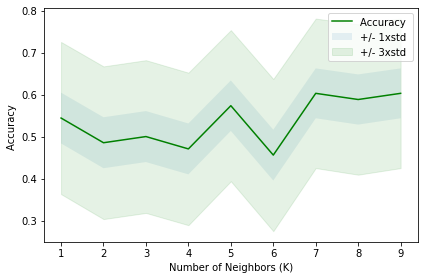

In [288]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [289]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.6029411764705882 with k= 7


In [290]:
print(recall_score(y10_test_r, predict10_r, average=None))
print(precision_score(y10_test_r, predict10_r, average=None))

[0.62068966 0.56410256]
[0.51428571 0.66666667]


In [291]:
predict10_r = pd.DataFrame(predict10_r)

In [292]:
predict10_r.shape

(68, 1)

In [293]:
merge_10_r = pd.DataFrame(y10_test_r)
merge_10_r.reset_index(drop=True,inplace=True)
merge_20_r = pd.DataFrame(X10_test_r)
merge_20_r['Winning Batting_Team'] = merge_10_r
test_10_r = merge_20_r

In [294]:
test_10_r.columns = [ 'KNN Prediction Bat Win 10',
       'SVM Prediction Bat Win 10', 'Log_Reger Prediction Bat Win 10',
       'Ran_forest Prediction Bat Win 10', 'Naive Bayes Bat Win 10','Winning Batting_Team']

In [295]:
test_10_r.head()

,KNN Prediction Bat Win 10,SVM Prediction Bat Win 10,Log_Reger Prediction Bat Win 10,Ran_forest Prediction Bat Win 10,Naive Bayes Bat Win 10,Winning Batting_Team
0,-1.022475,-1.040833,-1.040833,0.960769,-1.295597,1
1,0.978019,0.960769,0.960769,0.960769,0.771845,1
2,0.978019,0.960769,0.960769,0.960769,0.771845,1
3,-1.022475,-1.040833,-1.040833,-1.040833,0.771845,1
4,0.978019,-1.040833,0.960769,-1.040833,-1.295597,1


In [296]:
test_10_r['KNN Prediction Bat Win 10 New'] = round(predict10_r,1)

In [297]:
test_10_r.head()

,KNN Prediction Bat Win 10,SVM Prediction Bat Win 10,Log_Reger Prediction Bat Win 10,Ran_forest Prediction Bat Win 10,Naive Bayes Bat Win 10,Winning Batting_Team,KNN Prediction Bat Win 10 New
0,-1.022475,-1.040833,-1.040833,0.960769,-1.295597,1,1
1,0.978019,0.960769,0.960769,0.960769,0.771845,1,0
2,0.978019,0.960769,0.960769,0.960769,0.771845,1,0
3,-1.022475,-1.040833,-1.040833,-1.040833,0.771845,1,1
4,0.978019,-1.040833,0.960769,-1.040833,-1.295597,1,0


## SVM Model on 10 over retry

In [298]:
feature_df = test_10[['KNN Prediction Bat Win 10',
       'SVM Prediction Bat Win 10', 'Log_Reger Prediction Bat Win 10',
       'Ran_forest Prediction Bat Win 10', 'Naive Bayes Bat Win 10']]
X = np.asarray(feature_df)

In [299]:
test_10['Winning Batting_Team'] = test_10['Winning Batting_Team']
y = np.asarray(test_10['Winning Batting_Team'])
y [0:5]

array([0, 1, 0, 1, 0])

In [300]:
lab = preprocessing.LabelEncoder()
y_transformed10_r = lab.fit_transform(y)

X_transformed10_r = preprocessing.StandardScaler().fit(X).transform(X)


In [301]:
X10_S_train_r, X10_S_test_r, y10_S_train_r, y10_S_test_r = train_test_split( X_transformed10_r, y_transformed10_r, test_size=0.3, random_state=4)

clf = svm.SVC(kernel='rbf')

clf.fit(X10_S_train_r, y10_S_train_r) 

yhat10 = clf.predict(X10_S_test_r)

print(metrics.accuracy_score(y10_S_test_r, yhat10))
print(recall_score(y10_S_test_r, yhat10, average=None))
print(precision_score(y10_S_test_r, yhat10, average=None))

0.5
[0.75862069 0.30769231]
[0.44897959 0.63157895]


In [302]:
test_10_r['SVM Prediction Bat Win 10 New'] = yhat10
test_10_r.head()

,KNN Prediction Bat Win 10,SVM Prediction Bat Win 10,Log_Reger Prediction Bat Win 10,Ran_forest Prediction Bat Win 10,Naive Bayes Bat Win 10,Winning Batting_Team,KNN Prediction Bat Win 10 New,SVM Prediction Bat Win 10 New
0,-1.022475,-1.040833,-1.040833,0.960769,-1.295597,1,1,0
1,0.978019,0.960769,0.960769,0.960769,0.771845,1,0,0
2,0.978019,0.960769,0.960769,0.960769,0.771845,1,0,0
3,-1.022475,-1.040833,-1.040833,-1.040833,0.771845,1,1,1
4,0.978019,-1.040833,0.960769,-1.040833,-1.295597,1,0,1


## Logistic Regression 10 Over's Retry

In [303]:
X10_L_train_r, X10_L_test_r, y10_L_train_r, y10_L_test_r = train_test_split( X_transformed10_r, y_transformed10_r, test_size=0.3, random_state=4)

LR_r = LogisticRegression(C=0.01, solver='liblinear').fit(X10_L_train_r,y10_L_train_r)

L_predict10_r = LR_r.predict(X10_L_test_r)
L_predict10_r

print(metrics.accuracy_score(y10_L_test_r, L_predict10_r))
print(recall_score(y10_L_test_r, L_predict10_r, average=None))
print(precision_score(y10_L_test_r, L_predict10_r, average=None))

0.5882352941176471
[0.65517241 0.53846154]
[0.51351351 0.67741935]


In [304]:
L_predict10_r = pd.DataFrame(L_predict10_r)
L_predict10_r

,0
0,1
1,0
2,0
3,1
4,1
...,...
63,0
64,1
65,1
66,0


In [305]:
test_10_r['Log_Reger Prediction Bat Win 10 New'] = L_predict10_r

In [306]:
test_10_r.head()

,KNN Prediction Bat Win 10,SVM Prediction Bat Win 10,Log_Reger Prediction Bat Win 10,Ran_forest Prediction Bat Win 10,Naive Bayes Bat Win 10,Winning Batting_Team,KNN Prediction Bat Win 10 New,SVM Prediction Bat Win 10 New,Log_Reger Prediction Bat Win 10 New
0,-1.022475,-1.040833,-1.040833,0.960769,-1.295597,1,1,0,1
1,0.978019,0.960769,0.960769,0.960769,0.771845,1,0,0,0
2,0.978019,0.960769,0.960769,0.960769,0.771845,1,0,0,0
3,-1.022475,-1.040833,-1.040833,-1.040833,0.771845,1,1,1,1
4,0.978019,-1.040833,0.960769,-1.040833,-1.295597,1,0,1,1


## RandomForest 10 Over's Retry

In [307]:
X10_R_train_r, X10_R_test_r, y10_R_train_r, y10_R_test_r = train_test_split( X_transformed10_r, y_transformed10_r, test_size=0.3, random_state=4)

clf = RandomForestClassifier(n_estimators = 1000)

clf.fit(X10_R_train_r, y10_R_train_r)

y10_R_pred_r = clf.predict(X10_R_test_r)

print(metrics.accuracy_score(y10_R_test_r, y10_R_pred_r))
print(recall_score(y10_R_test_r, y10_R_pred_r, average=None))
print(precision_score(y10_R_test_r, y10_R_pred_r, average=None))

0.6470588235294118
[0.5862069  0.69230769]
[0.5862069  0.69230769]


In [308]:
y10_R_pred_r = pd.DataFrame(y10_R_pred_r)
y10_R_pred_r

,0
0,1
1,0
2,0
3,1
4,1
...,...
63,0
64,1
65,1
66,1


In [309]:
test_10_r['Ran_forest Prediction Bat Win 10 New'] = y10_R_pred_r

In [310]:
test_10_r.head()

,KNN Prediction Bat Win 10,SVM Prediction Bat Win 10,Log_Reger Prediction Bat Win 10,Ran_forest Prediction Bat Win 10,Naive Bayes Bat Win 10,Winning Batting_Team,KNN Prediction Bat Win 10 New,SVM Prediction Bat Win 10 New,Log_Reger Prediction Bat Win 10 New,Ran_forest Prediction Bat Win 10 New
0,-1.022475,-1.040833,-1.040833,0.960769,-1.295597,1,1,0,1,1
1,0.978019,0.960769,0.960769,0.960769,0.771845,1,0,0,0,0
2,0.978019,0.960769,0.960769,0.960769,0.771845,1,0,0,0,0
3,-1.022475,-1.040833,-1.040833,-1.040833,0.771845,1,1,1,1,1
4,0.978019,-1.040833,0.960769,-1.040833,-1.295597,1,0,1,1,1


## Naive Bayes 10 Over's Retry

In [311]:
X10_N_train_r, X10_N_test_r, y10_N_train_r, y10_N_test_r = train_test_split( X_transformed10_r, y_transformed10_r, test_size=0.3, random_state=4)

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X10_N_train_r, y10_N_train_r)

#Predict the response for test dataset
N_predict10_r = gnb.predict(X10_N_test_r)

print(metrics.accuracy_score(y10_N_test_r, N_predict10_r))
print(recall_score(y10_N_test_r, N_predict10_r, average=None))
print(precision_score(y10_N_test_r, N_predict10_r, average=None))

0.5882352941176471
[0.65517241 0.53846154]
[0.51351351 0.67741935]


In [312]:
N_predict10_r = pd.DataFrame(N_predict10_r)
N_predict10_r

,0
0,1
1,0
2,0
3,1
4,1
...,...
63,0
64,1
65,1
66,0


In [313]:
test_10_r['Naive Bayes Prediction Bat Win 10 New'] = N_predict10_r

In [314]:
test_10_r.head()

,KNN Prediction Bat Win 10,SVM Prediction Bat Win 10,Log_Reger Prediction Bat Win 10,Ran_forest Prediction Bat Win 10,Naive Bayes Bat Win 10,Winning Batting_Team,KNN Prediction Bat Win 10 New,SVM Prediction Bat Win 10 New,Log_Reger Prediction Bat Win 10 New,Ran_forest Prediction Bat Win 10 New,Naive Bayes Prediction Bat Win 10 New
0,-1.022475,-1.040833,-1.040833,0.960769,-1.295597,1,1,0,1,1,1
1,0.978019,0.960769,0.960769,0.960769,0.771845,1,0,0,0,0,0
2,0.978019,0.960769,0.960769,0.960769,0.771845,1,0,0,0,0,0
3,-1.022475,-1.040833,-1.040833,-1.040833,0.771845,1,1,1,1,1,1
4,0.978019,-1.040833,0.960769,-1.040833,-1.295597,1,0,1,1,1,1


# 15 Over's Retry Model

In [315]:
test_15.columns

Index(['Winning Batting_Team', 'KNN Prediction Bat Win 15',
       'SVM Prediction Bat Win 15', 'Log_Reger Prediction Bat Win 15',
       'Ran_forest Prediction Bat Win 15',
       'Naive Bayes Prediction Bat Win 15'],
      dtype='object')

In [316]:
cols = ['Winning Batting_Team', 'KNN Prediction Bat Win 15',
       'SVM Prediction Bat Win 15', 'Log_Reger Prediction Bat Win 15',
       'Ran_forest Prediction Bat Win 15',
       'Naive Bayes Prediction Bat Win 15']

In [317]:
X = [ 'KNN Prediction Bat Win 15',
       'SVM Prediction Bat Win 15', 'Log_Reger Prediction Bat Win 15',
       'Ran_forest Prediction Bat Win 15',
       'Naive Bayes Prediction Bat Win 15']
y = ['Winning Batting_Team']

In [318]:
X = test_15[X]
y = test_15[y]

In [319]:
lab = preprocessing.LabelEncoder()
y_transformed15_r = lab.fit_transform(y)
X_normalized_15_r = preprocessing.StandardScaler().fit(X).transform(X)

X15_train_r, X15_test_r, y15_train_r, y15_test_r = train_test_split( X_normalized_15_r, y_transformed15_r, test_size=0.3, random_state=4)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [320]:
K = 1
    
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = K).fit(X15_train_r,y15_train_r)

predict15_r = knn.predict(X15_test_r)

#### Acuracy Calculation

In [321]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X15_train_r,y15_train_r)
    predict1=neigh.predict(X15_test_r)
    mean_acc[n-1] = metrics.accuracy_score(y15_test_r, predict1)

    
    std_acc[n-1]=np.std(predict1==y15_test_r)/np.sqrt(predict1.shape[0])

mean_acc

array([0.89705882, 0.88235294, 0.85294118, 0.85294118, 0.85294118,
       0.85294118, 0.85294118, 0.85294118, 0.85294118])

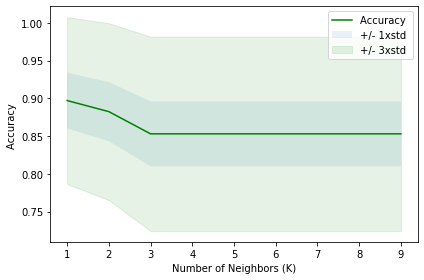

In [322]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [323]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8970588235294118 with k= 1


In [324]:
print(recall_score(y15_test_r, predict15_r, average=None))
print(precision_score(y15_test_r, predict15_r, average=None))

[0.90322581 0.89189189]
[0.875      0.91666667]


In [325]:
merge_15_r = pd.DataFrame(y15_test_r)
merge_15_r.reset_index(drop=True,inplace=True)
merge_30_r = pd.DataFrame(X15_test_r)
merge_30_r['Winning Batting_Team'] = merge_15_r
test_15_r = merge_30_r

In [326]:
test_15_r.columns = [ 'KNN Prediction Bat Win 15',
       'SVM Prediction Bat Win 15', 'Log_Reger Prediction Bat Win 15',
       'Ran_forest Prediction Bat Win 15',
       'Naive Bayes Prediction Bat Win 15','Winning Batting_Team']

In [327]:
test_15_r.head()

,KNN Prediction Bat Win 15,SVM Prediction Bat Win 15,Log_Reger Prediction Bat Win 15,Ran_forest Prediction Bat Win 15,Naive Bayes Prediction Bat Win 15,Winning Batting_Team
0,1.069045,0.969358,1.022475,0.878438,1.031610,1
1,1.069045,0.969358,1.022475,0.878438,1.031610,1
2,-0.935414,-1.031610,-0.978019,0.878438,-0.969358,0
3,1.069045,0.969358,1.022475,0.878438,1.031610,1
4,-0.935414,-1.031610,-0.978019,-1.138384,-0.969358,1


In [328]:
test_15_r['KNN Prediction Bat Win 15 New'] = predict15

In [329]:
test_15_r.head()

,KNN Prediction Bat Win 15,SVM Prediction Bat Win 15,Log_Reger Prediction Bat Win 15,Ran_forest Prediction Bat Win 15,Naive Bayes Prediction Bat Win 15,Winning Batting_Team,KNN Prediction Bat Win 15 New
0,1.069045,0.969358,1.022475,0.878438,1.031610,1,0
1,1.069045,0.969358,1.022475,0.878438,1.031610,1,0
2,-0.935414,-1.031610,-0.978019,0.878438,-0.969358,0,1
3,1.069045,0.969358,1.022475,0.878438,1.031610,1,1
4,-0.935414,-1.031610,-0.978019,-1.138384,-0.969358,1,0


## SVM Model on 15 Over Retry

In [330]:
feature_df = test_15[[ 'KNN Prediction Bat Win 15',
       'SVM Prediction Bat Win 15', 'Log_Reger Prediction Bat Win 15',
       'Ran_forest Prediction Bat Win 15',
       'Naive Bayes Prediction Bat Win 15']]
X = np.asarray(feature_df)

In [331]:
test_15['Winning Batting_Team'] = test_15['Winning Batting_Team']
y = np.asarray(test_15['Winning Batting_Team'])
y [0:5]

array([0, 0, 1, 1, 0])

In [332]:
lab = preprocessing.LabelEncoder()
y_transformed15_r = lab.fit_transform(y)

X_transformed15_r = preprocessing.StandardScaler().fit(X).transform(X)

X15_S_train_r, X15_S_test_r, y15_S_train_r, y15_S_test_r = train_test_split( X_transformed15_r, y_transformed15_r, test_size=0.3, random_state=4)

clf = svm.SVC(kernel='rbf')

clf.fit(X15_S_train_r, y15_S_train_r) 

yhat15 = clf.predict(X15_S_test_r)

print(metrics.accuracy_score(y15_S_test_r, yhat15))
print(recall_score(y15_S_test_r, yhat15, average=None))
print(precision_score(y15_S_test_r, yhat15, average=None))

0.8970588235294118
[0.90322581 0.89189189]
[0.875      0.91666667]


In [333]:
test_15_r['SVM Prediction Bat Win 15 New'] = yhat15
test_15_r.head()

,KNN Prediction Bat Win 15,SVM Prediction Bat Win 15,Log_Reger Prediction Bat Win 15,Ran_forest Prediction Bat Win 15,Naive Bayes Prediction Bat Win 15,Winning Batting_Team,KNN Prediction Bat Win 15 New,SVM Prediction Bat Win 15 New
0,1.069045,0.969358,1.022475,0.878438,1.031610,1,0,1
1,1.069045,0.969358,1.022475,0.878438,1.031610,1,0,1
2,-0.935414,-1.031610,-0.978019,0.878438,-0.969358,0,1,1
3,1.069045,0.969358,1.022475,0.878438,1.031610,1,1,1
4,-0.935414,-1.031610,-0.978019,-1.138384,-0.969358,1,0,0


## Logistic Regression 15 Over's retry

In [334]:
X15_L_train_r, X15_L_test_r, y15_L_train_r, y15_L_test_r = train_test_split( X_transformed15_r, y_transformed15_r, test_size=0.3, random_state=4)

LR_r = LogisticRegression(C=0.01, solver='liblinear').fit(X15_L_train_r,y15_L_train_r)

L_predict15_r = LR_r.predict(X15_L_test_r)
L_predict15_r

print(metrics.accuracy_score(y15_L_test_r, L_predict15_r))
print(recall_score(y15_L_test_r, L_predict15_r, average=None))
print(precision_score(y15_L_test_r, L_predict15_r, average=None))

0.8529411764705882
[0.90322581 0.81081081]
[0.8        0.90909091]


In [335]:
L_predict15_r = pd.DataFrame(L_predict15_r)
L_predict15_r

,0
0,1
1,1
2,0
3,1
4,0
...,...
63,1
64,1
65,0
66,1


In [336]:
test_15_r['Log_Reger Prediction Bat Win 15 New'] = L_predict15_r

In [337]:
test_15_r.head()

,KNN Prediction Bat Win 15,SVM Prediction Bat Win 15,Log_Reger Prediction Bat Win 15,Ran_forest Prediction Bat Win 15,Naive Bayes Prediction Bat Win 15,Winning Batting_Team,KNN Prediction Bat Win 15 New,SVM Prediction Bat Win 15 New,Log_Reger Prediction Bat Win 15 New
0,1.069045,0.969358,1.022475,0.878438,1.031610,1,0,1,1
1,1.069045,0.969358,1.022475,0.878438,1.031610,1,0,1,1
2,-0.935414,-1.031610,-0.978019,0.878438,-0.969358,0,1,1,0
3,1.069045,0.969358,1.022475,0.878438,1.031610,1,1,1,1
4,-0.935414,-1.031610,-0.978019,-1.138384,-0.969358,1,0,0,0


## Random Fores 15 Over's retry

In [338]:
X15_R_train_r, X15_R_test_r, y15_R_train_r, y15_R_test_r = train_test_split( X_transformed15_r, y_transformed15_r, test_size=0.3, random_state=4)

clf = RandomForestClassifier(n_estimators = 1000)

clf.fit(X15_R_train_r, y15_R_train_r)

y15_R_pred_r = clf.predict(X15_R_test_r)

print(metrics.accuracy_score(y15_R_test_r, y15_R_pred_r))
print(recall_score(y15_R_test_r, y15_R_pred_r, average=None))
print(precision_score(y15_R_test_r, y15_R_pred_r, average=None))

0.9117647058823529
[0.90322581 0.91891892]
[0.90322581 0.91891892]


In [339]:
y15_R_pred_r = pd.DataFrame(y15_R_pred_r)
y15_R_pred_r

,0
0,1
1,1
2,1
3,1
4,0
...,...
63,1
64,0
65,1
66,1


In [340]:
test_15_r['Ran_forest Prediction Bat Win 15 New'] = y15_R_pred_r

In [341]:
test_15_r.head()

,KNN Prediction Bat Win 15,SVM Prediction Bat Win 15,Log_Reger Prediction Bat Win 15,Ran_forest Prediction Bat Win 15,Naive Bayes Prediction Bat Win 15,Winning Batting_Team,KNN Prediction Bat Win 15 New,SVM Prediction Bat Win 15 New,Log_Reger Prediction Bat Win 15 New,Ran_forest Prediction Bat Win 15 New
0,1.069045,0.969358,1.022475,0.878438,1.031610,1,0,1,1,1
1,1.069045,0.969358,1.022475,0.878438,1.031610,1,0,1,1,1
2,-0.935414,-1.031610,-0.978019,0.878438,-0.969358,0,1,1,0,1
3,1.069045,0.969358,1.022475,0.878438,1.031610,1,1,1,1,1
4,-0.935414,-1.031610,-0.978019,-1.138384,-0.969358,1,0,0,0,0


## Naive Bayes 15 Over's retry

In [342]:
X15_N_train_r, X15_N_test_r, y15_N_train_r, y15_N_test_r = train_test_split( X_transformed15_r, y_transformed15_r, test_size=0.3, random_state=4)

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X15_N_train_r, y15_N_train_r)

#Predict the response for test dataset
N_predict15_r = gnb.predict(X15_N_test_r)

print(metrics.accuracy_score(y15_N_test_r, N_predict15_r))
print(recall_score(y15_N_test_r, N_predict15_r, average=None))
print(precision_score(y15_N_test_r, N_predict15_r, average=None))

0.8382352941176471
[0.83870968 0.83783784]
[0.8125     0.86111111]


In [343]:
N_predict15_r = pd.DataFrame(N_predict15_r)
N_predict15_r

,0
0,1
1,1
2,0
3,1
4,0
...,...
63,1
64,1
65,1
66,1


In [344]:
test_15_r['Naive Bayes Prediction Bat Win 15 New'] = N_predict15_r

In [345]:
test_15_r.head()

,KNN Prediction Bat Win 15,SVM Prediction Bat Win 15,Log_Reger Prediction Bat Win 15,Ran_forest Prediction Bat Win 15,Naive Bayes Prediction Bat Win 15,Winning Batting_Team,KNN Prediction Bat Win 15 New,SVM Prediction Bat Win 15 New,Log_Reger Prediction Bat Win 15 New,Ran_forest Prediction Bat Win 15 New,Naive Bayes Prediction Bat Win 15 New
0,1.069045,0.969358,1.022475,0.878438,1.031610,1,0,1,1,1,1
1,1.069045,0.969358,1.022475,0.878438,1.031610,1,0,1,1,1,1
2,-0.935414,-1.031610,-0.978019,0.878438,-0.969358,0,1,1,0,1,0
3,1.069045,0.969358,1.022475,0.878438,1.031610,1,1,1,1,1,1
4,-0.935414,-1.031610,-0.978019,-1.138384,-0.969358,1,0,0,0,0,0


# 20 Over's Retry Model

In [346]:
test_20.columns

Index(['Winning % Batting_Team', 'KNN Prediction Bat Win 20',
       'SVM Prediction Bat Win 20', 'Log_Reger Prediction Bat Win 20',
       'Ran_forest Prediction Bat Win 20',
       'Naive Bayes Prediction Bat Win 20'],
      dtype='object')

In [347]:
cols = ['Winning % Batting_Team', 'KNN Prediction Bat Win 20',
       'SVM Prediction Bat Win 20', 'Log_Reger Prediction Bat Win 20',
       'Ran_forest Prediction Bat Win 20',
       'Naive Bayes Prediction Bat Win 20']

In [348]:
X = [ 'KNN Prediction Bat Win 20',
       'SVM Prediction Bat Win 20', 'Log_Reger Prediction Bat Win 20',
       'Ran_forest Prediction Bat Win 20',
       'Naive Bayes Prediction Bat Win 20']
y = ['Winning % Batting_Team']

In [349]:
X = test_20[X]
y = test_20[y]

In [350]:
lab = preprocessing.LabelEncoder()
y_transformed20_r = lab.fit_transform(y)
X_normalized_20_r = preprocessing.StandardScaler().fit(X).transform(X)

X20_train_r, X20_test_r, y20_train_r, y20_test_r = train_test_split( X_normalized_20_r, y_transformed20_r, test_size=0.3, random_state=4)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [351]:
K = 7
    
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = K).fit(X20_train_r,y20_train_r)

predict20_r = knn.predict(X20_test_r)

#### Acuracy Calculation

In [352]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X20_train_r,y20_train_r)
    predict1=neigh.predict(X20_test_r)
    mean_acc[n-1] = metrics.accuracy_score(y20_test_r, predict1)

    
    std_acc[n-1]=np.std(predict1==y20_test_r)/np.sqrt(predict1.shape[0])

mean_acc

array([0.91176471, 0.91176471, 0.92647059, 0.91176471, 0.91176471,
       0.91176471, 0.92647059, 0.94117647, 0.92647059])

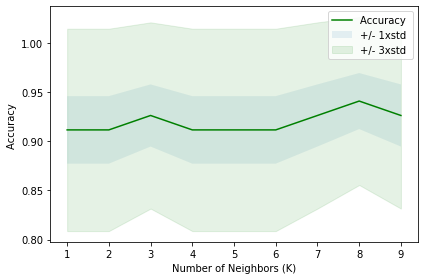

In [353]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [354]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 
print(recall_score(y20_test_r, predict20_r, average=None))
print(precision_score(y20_test_r, predict20_r, average=None))

The best accuracy was with 0.9411764705882353 with k= 8
[0.92       0.93023256]
[0.88461538 0.95238095]


In [355]:
merge_20_r = pd.DataFrame(y20_test_r)
merge_20_r.reset_index(drop=True,inplace=True)
merge_40_r = pd.DataFrame(X20_test_r)
merge_40_r['Winning Batting_Team'] = merge_20_r
test_20_r = merge_40_r

In [356]:
test_20_r.columns = [ 'KNN Prediction Bat Win 20',
       'SVM Prediction Bat Win 20', 'Log_Reger Prediction Bat Win 20',
       'Ran_forest Prediction Bat Win 20',
       'Naive Bayes Prediction Bat Win 20','Winning Batting_Team']

In [357]:
test_20_r.head()

,KNN Prediction Bat Win 20,SVM Prediction Bat Win 20,Log_Reger Prediction Bat Win 20,Ran_forest Prediction Bat Win 20,Naive Bayes Prediction Bat Win 20,Winning Batting_Team
0,-1.022475,-1.138384,-0.894427,-1.213477,-1.069045,0
1,0.978019,0.878438,1.118034,0.824078,0.935414,1
2,0.978019,0.878438,1.118034,0.824078,-1.069045,1
3,-1.022475,-1.138384,-0.894427,-1.213477,-1.069045,0
4,0.978019,0.878438,1.118034,0.824078,0.935414,1


In [358]:
test_20_r['KNN Prediction Bat Win 20 New'] = predict20

In [359]:
test_20_r.head()

,KNN Prediction Bat Win 20,SVM Prediction Bat Win 20,Log_Reger Prediction Bat Win 20,Ran_forest Prediction Bat Win 20,Naive Bayes Prediction Bat Win 20,Winning Batting_Team,KNN Prediction Bat Win 20 New
0,-1.022475,-1.138384,-0.894427,-1.213477,-1.069045,0,0
1,0.978019,0.878438,1.118034,0.824078,0.935414,1,0
2,0.978019,0.878438,1.118034,0.824078,-1.069045,1,0
3,-1.022475,-1.138384,-0.894427,-1.213477,-1.069045,0,0
4,0.978019,0.878438,1.118034,0.824078,0.935414,1,1


## SVM Model ON 20 Overs Retry

In [360]:
feature_df = test_20[[ 'KNN Prediction Bat Win 20',
       'SVM Prediction Bat Win 20', 'Log_Reger Prediction Bat Win 20',
       'Ran_forest Prediction Bat Win 20',
       'Naive Bayes Prediction Bat Win 20']]
X = np.asarray(feature_df)

In [361]:
test_20['Winning % Batting_Team'] = test_20['Winning % Batting_Team']
y = np.asarray(test_20['Winning % Batting_Team'])
y [0:5]

array([0, 0, 1, 0, 1])

In [362]:
lab = preprocessing.LabelEncoder()
y_transformed20_r = lab.fit_transform(y)

X_transformed20_r = preprocessing.StandardScaler().fit(X).transform(X)

X20_S_train_r, X20_S_test_r, y20_S_train_r, y20_S_test_r = train_test_split( X_transformed20_r, y_transformed20_r, test_size=0.3, random_state=4)

clf = svm.SVC(kernel='rbf')

clf.fit(X20_S_train_r, y20_S_train_r) 

yhat20 = clf.predict(X20_S_test_r)

print(metrics.accuracy_score(y20_S_test_r, yhat20))
print(recall_score(y20_S_test_r, yhat20, average=None))
print(precision_score(y20_S_test_r, yhat20, average=None))

0.9411764705882353
[0.96       0.93023256]
[0.88888889 0.97560976]


In [363]:
test_20_r['SVM Prediction Bat Win 20 New'] = yhat20
test_20_r.head()

,KNN Prediction Bat Win 20,SVM Prediction Bat Win 20,Log_Reger Prediction Bat Win 20,Ran_forest Prediction Bat Win 20,Naive Bayes Prediction Bat Win 20,Winning Batting_Team,KNN Prediction Bat Win 20 New,SVM Prediction Bat Win 20 New
0,-1.022475,-1.138384,-0.894427,-1.213477,-1.069045,0,0,0
1,0.978019,0.878438,1.118034,0.824078,0.935414,1,0,1
2,0.978019,0.878438,1.118034,0.824078,-1.069045,1,0,1
3,-1.022475,-1.138384,-0.894427,-1.213477,-1.069045,0,0,0
4,0.978019,0.878438,1.118034,0.824078,0.935414,1,1,1


## Logistic Regression 20 Over's Retry

In [364]:
X20_L_train_r, X20_L_test_r, y20_L_train_r, y20_L_test_r = train_test_split( X_transformed20_r, y_transformed20_r, test_size=0.3, random_state=4)

LR_r = LogisticRegression(C=0.01, solver='liblinear').fit(X20_L_train_r,y20_L_train_r)

L_predict20_r = LR_r.predict(X20_L_test_r)
L_predict20_r

print(metrics.accuracy_score(y20_L_test_r, L_predict20_r))
print(recall_score(y20_L_test_r, L_predict20_r, average=None))
print(precision_score(y20_L_test_r, L_predict15_r, average=None))

0.9117647058823529
[0.96       0.88372093]
[0.31428571 0.57575758]


In [365]:
L_predict20_r = pd.DataFrame(L_predict20_r)
L_predict20_r

,0
0,0
1,1
2,1
3,0
4,1
...,...
63,0
64,0
65,0
66,0


In [366]:
test_20_r['Log_Reger Prediction Bat Win 20 New'] = L_predict20_r

In [367]:
test_20_r.head()

,KNN Prediction Bat Win 20,SVM Prediction Bat Win 20,Log_Reger Prediction Bat Win 20,Ran_forest Prediction Bat Win 20,Naive Bayes Prediction Bat Win 20,Winning Batting_Team,KNN Prediction Bat Win 20 New,SVM Prediction Bat Win 20 New,Log_Reger Prediction Bat Win 20 New
0,-1.022475,-1.138384,-0.894427,-1.213477,-1.069045,0,0,0,0
1,0.978019,0.878438,1.118034,0.824078,0.935414,1,0,1,1
2,0.978019,0.878438,1.118034,0.824078,-1.069045,1,0,1,1
3,-1.022475,-1.138384,-0.894427,-1.213477,-1.069045,0,0,0,0
4,0.978019,0.878438,1.118034,0.824078,0.935414,1,1,1,1


## RandomForest 20 Over's Retry

In [368]:
X20_R_train_r, X20_R_test_r, y20_R_train_r, y20_R_test_r = train_test_split( X_transformed20_r, y_transformed20_r, test_size=0.3, random_state=4)

clf = RandomForestClassifier(n_estimators = 1000)

clf.fit(X20_R_train_r, y20_R_train_r)

y20_R_pred_r = clf.predict(X20_R_test_r)

print(metrics.accuracy_score(y20_R_test_r, y20_R_pred_r))
print(recall_score(y20_R_test_r, y20_R_pred_r, average=None))
print(precision_score(y20_R_test_r, y20_R_pred_r, average=None))

0.9264705882352942
[0.96       0.90697674]
[0.85714286 0.975     ]


In [369]:
y20_R_pred_r = pd.DataFrame(y20_R_pred_r)
y20_R_pred_r

,0
0,0
1,1
2,1
3,0
4,1
...,...
63,0
64,0
65,0
66,0


In [370]:
test_20_r['Ran_forest Prediction Bat Win 20 New'] = y20_R_pred_r

In [371]:
test_20_r.head()

,KNN Prediction Bat Win 20,SVM Prediction Bat Win 20,Log_Reger Prediction Bat Win 20,Ran_forest Prediction Bat Win 20,Naive Bayes Prediction Bat Win 20,Winning Batting_Team,KNN Prediction Bat Win 20 New,SVM Prediction Bat Win 20 New,Log_Reger Prediction Bat Win 20 New,Ran_forest Prediction Bat Win 20 New
0,-1.022475,-1.138384,-0.894427,-1.213477,-1.069045,0,0,0,0,0
1,0.978019,0.878438,1.118034,0.824078,0.935414,1,0,1,1,1
2,0.978019,0.878438,1.118034,0.824078,-1.069045,1,0,1,1,1
3,-1.022475,-1.138384,-0.894427,-1.213477,-1.069045,0,0,0,0,0
4,0.978019,0.878438,1.118034,0.824078,0.935414,1,1,1,1,1


## Naive Bayes 20 Over's Retry

In [372]:
X20_N_train_r, X20_N_test_r, y20_N_train_r, y20_N_test_r = train_test_split( X_transformed20_r, y_transformed20_r, test_size=0.3, random_state=4)

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X20_N_train_r, y20_N_train_r)

#Predict the response for test dataset
N_predict20_r = gnb.predict(X20_N_test_r)

print(metrics.accuracy_score(y20_N_test_r, N_predict20_r))
print(recall_score(y20_N_test_r, N_predict20_r, average=None))
print(precision_score(y20_N_test_r, N_predict20_r, average=None))

0.9264705882352942
[0.96       0.90697674]
[0.85714286 0.975     ]


In [373]:
N_predict20_r = pd.DataFrame(N_predict20_r)
N_predict20_r

,0
0,0
1,1
2,1
3,0
4,1
...,...
63,0
64,0
65,0
66,0


In [374]:
test_20_r['Naive Bayes Prediction Bat Win 20 New'] = N_predict20_r

In [375]:
test_20_r.head()

,KNN Prediction Bat Win 20,SVM Prediction Bat Win 20,Log_Reger Prediction Bat Win 20,Ran_forest Prediction Bat Win 20,Naive Bayes Prediction Bat Win 20,Winning Batting_Team,KNN Prediction Bat Win 20 New,SVM Prediction Bat Win 20 New,Log_Reger Prediction Bat Win 20 New,Ran_forest Prediction Bat Win 20 New,Naive Bayes Prediction Bat Win 20 New
0,-1.022475,-1.138384,-0.894427,-1.213477,-1.069045,0,0,0,0,0,0
1,0.978019,0.878438,1.118034,0.824078,0.935414,1,0,1,1,1,1
2,0.978019,0.878438,1.118034,0.824078,-1.069045,1,0,1,1,1,1
3,-1.022475,-1.138384,-0.894427,-1.213477,-1.069045,0,0,0,0,0,0
4,0.978019,0.878438,1.118034,0.824078,0.935414,1,1,1,1,1,1


In [376]:
test_6_r.columns

Index(['KNN Prediction Bat Win 6', 'SVM Prediction Bat Win 6',
       'Log_Reger Prediction Bat Win 6', 'Ran_forest Prediction Bat Win 6',
       'Naive Bayes Prediction Bat Win 6', 'Winning Batting_Team',
       'KNN Prediction Bat Win 6 New', 'SVM Prediction Bat Win 6 New',
       'Log_Reger Prediction Bat Win 6 New',
       'Ran_forest Prediction Bat Win 6 New',
       'Naive Bayes Prediction Bat Win 6 New'],
      dtype='object')

In [377]:
test_6_r = test_6_r.drop(['KNN Prediction Bat Win 6', 'SVM Prediction Bat Win 6',
       'Log_Reger Prediction Bat Win 6', 'Ran_forest Prediction Bat Win 6',
       'Naive Bayes Prediction Bat Win 6'],axis=1)

In [378]:
test_10_r.columns

Index(['KNN Prediction Bat Win 10', 'SVM Prediction Bat Win 10',
       'Log_Reger Prediction Bat Win 10', 'Ran_forest Prediction Bat Win 10',
       'Naive Bayes Bat Win 10', 'Winning Batting_Team',
       'KNN Prediction Bat Win 10 New', 'SVM Prediction Bat Win 10 New',
       'Log_Reger Prediction Bat Win 10 New',
       'Ran_forest Prediction Bat Win 10 New',
       'Naive Bayes Prediction Bat Win 10 New'],
      dtype='object')

In [379]:
test_10_r = test_10_r.drop(['KNN Prediction Bat Win 10', 'SVM Prediction Bat Win 10',
       'Log_Reger Prediction Bat Win 10', 'Ran_forest Prediction Bat Win 10',
       'Naive Bayes Bat Win 10'],axis=1)

In [380]:
test_15_r.columns

Index(['KNN Prediction Bat Win 15', 'SVM Prediction Bat Win 15',
       'Log_Reger Prediction Bat Win 15', 'Ran_forest Prediction Bat Win 15',
       'Naive Bayes Prediction Bat Win 15', 'Winning Batting_Team',
       'KNN Prediction Bat Win 15 New', 'SVM Prediction Bat Win 15 New',
       'Log_Reger Prediction Bat Win 15 New',
       'Ran_forest Prediction Bat Win 15 New',
       'Naive Bayes Prediction Bat Win 15 New'],
      dtype='object')

In [381]:
test_15_r = test_15_r.drop(['KNN Prediction Bat Win 15', 'SVM Prediction Bat Win 15',
       'Log_Reger Prediction Bat Win 15', 'Ran_forest Prediction Bat Win 15',
       'Naive Bayes Prediction Bat Win 15'],axis=1)

In [382]:
test_20_r.columns

Index(['KNN Prediction Bat Win 20', 'SVM Prediction Bat Win 20',
       'Log_Reger Prediction Bat Win 20', 'Ran_forest Prediction Bat Win 20',
       'Naive Bayes Prediction Bat Win 20', 'Winning Batting_Team',
       'KNN Prediction Bat Win 20 New', 'SVM Prediction Bat Win 20 New',
       'Log_Reger Prediction Bat Win 20 New',
       'Ran_forest Prediction Bat Win 20 New',
       'Naive Bayes Prediction Bat Win 20 New'],
      dtype='object')

In [383]:
test_20_r = test_20_r.drop(['KNN Prediction Bat Win 20', 'SVM Prediction Bat Win 20',
       'Log_Reger Prediction Bat Win 20', 'Ran_forest Prediction Bat Win 20',
       'Naive Bayes Prediction Bat Win 20'],axis=1)

In [384]:
test_6_r.head()

,Winning Batting_Team,KNN Prediction Bat Win 6 New,SVM Prediction Bat Win 6 New,Log_Reger Prediction Bat Win 6 New,Ran_forest Prediction Bat Win 6 New,Naive Bayes Prediction Bat Win 6 New
0,0,0,0,0,0,0
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,0,0,0,0,0,0
4,1,1,0,1,1,1


In [385]:
test_10_r.head()

,Winning Batting_Team,KNN Prediction Bat Win 10 New,SVM Prediction Bat Win 10 New,Log_Reger Prediction Bat Win 10 New,Ran_forest Prediction Bat Win 10 New,Naive Bayes Prediction Bat Win 10 New
0,1,1,0,1,1,1
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,1,1,1,1,1
4,1,0,1,1,1,1


In [386]:
test_15_r.head()

,Winning Batting_Team,KNN Prediction Bat Win 15 New,SVM Prediction Bat Win 15 New,Log_Reger Prediction Bat Win 15 New,Ran_forest Prediction Bat Win 15 New,Naive Bayes Prediction Bat Win 15 New
0,1,0,1,1,1,1
1,1,0,1,1,1,1
2,0,1,1,0,1,0
3,1,1,1,1,1,1
4,1,0,0,0,0,0


In [387]:
test_20_r.head()

,Winning Batting_Team,KNN Prediction Bat Win 20 New,SVM Prediction Bat Win 20 New,Log_Reger Prediction Bat Win 20 New,Ran_forest Prediction Bat Win 20 New,Naive Bayes Prediction Bat Win 20 New
0,0,0,0,0,0,0
1,1,0,1,1,1,1
2,1,0,1,1,1,1
3,0,0,0,0,0,0
4,1,1,1,1,1,1




---

# **The End**



---

